Нормализация и стандартизация

In [137]:
#!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 5.0 MB/s eta 0:00:00


In [110]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

from lightgbm import LGBMRegressor # Импортирует класс LGBMRegressor из библиотеки LightGBM для использования в задачах машинного обучения
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from scikeras.wrappers import KerasRegressor
from tensorflow.keras import layers
from keras import layers

from joblib import dump

%matplotlib inline

In [2]:
df = pd.read_excel('X_data.xlsx')

In [3]:
#столбец "Unnamed" неинформативен, удаляем его
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.describe().T

count         mean         std          min  \
Соотношение_матрица_наполнитель  1023.0     2.925146    0.892296     0.547391   
Плотность                        1023.0  1974.778867   70.843002  1784.482245   
Модуль_упругости                 1023.0   736.834332  325.204734     2.436909   
Количество_отвердителя           1023.0   110.558141   26.661661    38.668500   
Содержание_эпоксидных_групп      1023.0    22.241659    2.369521    15.695894   
Температура_вспышки              1023.0   286.053223   39.213922   186.508613   
Поверхностная_плотность          1023.0   480.886331  278.400394     0.603740   
Модуль_упругости_при_растяжении  1023.0    73.302809    3.032067    65.553336   
Прочность_при_растяжении         1023.0  2459.670550  457.512250  1250.392802   
Потребление_смолы                1023.0   218.392942   57.277545    72.530873   
Угол_нашивки                     1023.0     0.491691    0.500175     0.000000   
Шаг_нашивки                      1023.0     6.870613    2.521972     0.000000   
Плотность_нашивки                1023.0    57.558971   10.804565    29.745849   

                                         25%          50%          75%  \
Соотношение_матрица_наполнитель     2.321061     2.906383     3.548775   
Плотность                        1924.535020  1977.450684  2020.628746   
Модуль_упругости                  500.047452   738.957167   957.175119   
Количество_отвердителя             92.883002   110.564840   129.233303   
Содержание_эпоксидных_групп        20.615227    22.230744    23.961468   
Температура_вспышки               259.487105   285.896812   312.586724   
Поверхностная_плотность           266.816645   451.313045   691.775979   
Модуль_упругости_при_растяжении    71.287231    73.264735    75.316695   
Прочность_при_растяжении         2146.295983  2457.959767  2751.668715   
Потребление_смолы                 180.146597   219.179155   256.760915   
Угол_нашивки                        0.000000     0.000000     1.000000   
Шаг_нашивки                         5.080033     6.908628     8.575956   
Плотность_нашивки                  50.350869    57.516472    64.561409   

                                         max  
Соотношение_матрица_наполнитель     5.314144  
Плотность                        2161.565216  
Модуль_упругости                 1628.000000  
Количество_отвердителя            181.828448  
Содержание_эпоксидных_групп        28.955094  
Температура_вспышки               386.067992  
Поверхностная_плотность          1291.340115  
Модуль_упругости_при_растяжении    81.203147  
Прочность_при_растяжении         3656.158363  
Потребление_смолы                 359.052220  
Угол_нашивки                        1.000000  
Шаг_нашивки                        13.732404  
Плотность_нашивки                  85.660996

Работа аналитических моделей в машинном обучении, построена таким образом, чтобы минимизировать ошибку и большой дисбаланс между значениями признака, может вызвать неустойчивое работы нашей модели, соответственно ухудшить результат.

Нормализация - это процедура предобработки входной информации, при котором значения признаков во входном векторе приводятся к некоторому заданному диапазону, например, [0...1] или [-1...1, при данном методе ориентируемя на max и min, после нормализации само распределение не меняется

Нормализацией мы добьемся, что бы признаки одинаково влияли на результат

Стандартизация - приведение к нормальному формату и представлению, которые обеспечивают их корректное применение в многомерном анализе, совместных исследования, сложных технологиях аналитической обработки(приведение к матожиданию =0 и стандартному отклонению = 1), при данном методе учитываем среднее и стандартное отклонение, после стандартизации могут быть отрицательные значения

Стандартизация позволяет устранить возможные влияния отклонения по какому-нибудь значению признака

В нашей задаче будем использовать MinMaxScaler

In [5]:
mimmax_scaler= MinMaxScaler()
#обучение
data = pd.DataFrame(mimmax_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [6]:
data.describe().T

count      mean       std  min       25%  \
Соотношение_матрица_наполнитель  1023.0  0.498821  0.187192  0.0  0.372092   
Плотность                        1023.0  0.504655  0.187871  0.0  0.371411   
Модуль_упругости                 1023.0  0.451780  0.200057  0.0  0.306116   
Количество_отвердителя           1023.0  0.502163  0.186237  0.0  0.378699   
Содержание_эпоксидных_групп      1023.0  0.493677  0.178708  0.0  0.371013   
Температура_вспышки              1023.0  0.498822  0.196503  0.0  0.365698   
Поверхностная_плотность          1023.0  0.372100  0.215691  0.0  0.206249   
Модуль_упругости_при_растяжении  1023.0  0.495180  0.193745  0.0  0.366387   
Прочность_при_растяжении         1023.0  0.502658  0.190173  0.0  0.372398   
Потребление_смолы                1023.0  0.509079  0.199907  0.0  0.375594   
Угол_нашивки                     1023.0  0.491691  0.500175  0.0  0.000000   
Шаг_нашивки                      1023.0  0.500321  0.183651  0.0  0.369930   
Плотность_нашивки                1023.0  0.497417  0.193231  0.0  0.368505   

                                      50%       75%  max  
Соотношение_матрица_наполнитель  0.494885  0.629650  1.0  
Плотность                        0.511740  0.626245  1.0  
Модуль_упругости                 0.453086  0.587328  1.0  
Количество_отвердителя           0.502210  0.632613  1.0  
Содержание_эпоксидных_групп      0.492854  0.623384  1.0  
Температура_вспышки              0.498038  0.631782  1.0  
Поверхностная_плотность          0.349188  0.535487  1.0  
Модуль_упругости_при_растяжении  0.492747  0.623864  1.0  
Прочность_при_растяжении         0.501947  0.624033  1.0  
Потребление_смолы                0.511823  0.642989  1.0  
Угол_нашивки                     0.000000  1.000000  1.0  
Шаг_нашивки                      0.503089  0.624505  1.0  
Плотность_нашивки                0.496657  0.622650  1.0

Среднее значение всех признаков приблизительно в одном диапозоне

<Axes: ylabel='Density'>

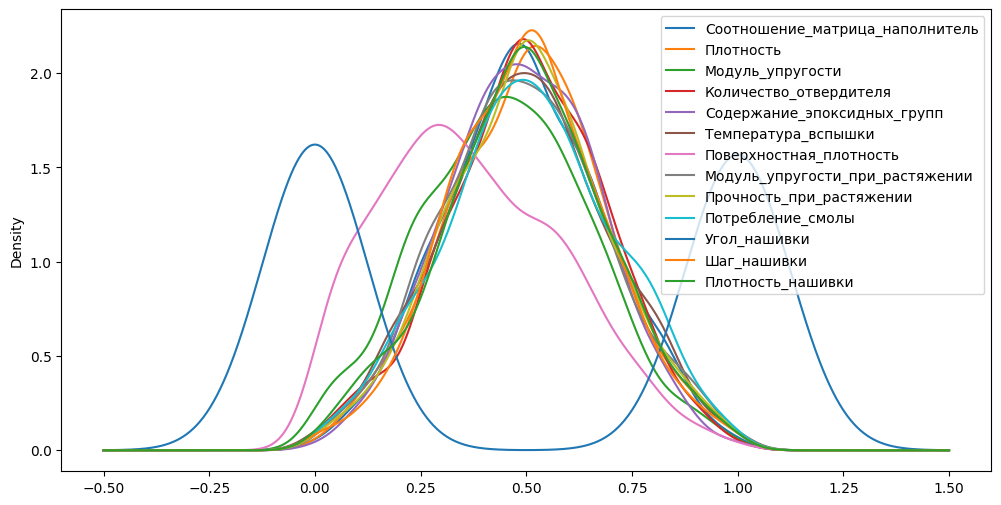

In [7]:
fig, ax = plt.subplots(figsize = (12, 6))#fig-размер по горизонтали, ax - размер по вертикали
data.plot(kind = 'kde', ax = ax) # kind - график плотности ядра

## Модели прогноза для «Модуль упругости при растяжении» и «Прочность при растяжении»

In [8]:
# удаляем из основных данных столбец, который будем прогназировать и присваем его y.
x_upr = data.drop(['Модуль_упругости_при_растяжении'], axis=1)
x_pr = data.drop(['Прочность_при_растяжении'], axis=1)
y_upr = data[['Модуль_упругости_при_растяжении']]
y_pr = data[['Прочность_при_растяжении']]

# делим датасет на тренировочную и тестовую выборки.
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=46)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=46)

In [9]:
X_train_upr.shape, X_test_upr.shape, y_train_upr.shape, y_test_upr.shape

((716, 12), (307, 12), (716, 1), (307, 1))

In [10]:
X_train_pr.shape, X_test_pr.shape, y_train_pr.shape, y_test_pr.shape

((716, 12), (307, 12), (716, 1), (307, 1))

In [11]:
# Создаем DataFrame, куда в дальнейшем будем добавлять метрики моделей
info_data = pd.DataFrame(columns=['target', 'model', 'MAE', 'MSE', 'MAPE', 'RMSE', 'R2', 'score'])

In [12]:
# Объявим модели и составим из них список, а так же сделаем список их названий
lr = LinearRegression()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
abr = AdaBoostRegressor()
lgbm = LGBMRegressor()
models_list = [lr, rf, knn, svr, dtr, abr,lgbm]
models_name_list = ['LinearRegression', 'RandomForestRegressor', 'KNeighborsRegressor',
                    'SVR', 'DecisionTreeRegressor', 'AdaBoostRegressor','LGBMRegressor']

In [13]:
# Пишем функцию для выда метрик эффективности, для моделей, переданных в качестве аргумента
def metrics(models_list, models_name_list, X_train, y_train, X_test, y_test):
    global info_data
    k = 0
    for i in models_list:     #перебор моделей
        model = i.fit(X_train, y_train)    #обучение модели
        model_pred = model.predict(X_test)    #предсказание на тестовых данных
        MAE = round(mean_absolute_error(y_test, model_pred), 3)             #средняя абсолютная ошибка
        MSE = round(mean_squared_error(y_test, model_pred), 3)              #среднеквадратичная ошибка
        MAPE = round(mean_absolute_percentage_error(y_test, model_pred), 3) #среднее абсолютное отклонение в процентах
        RMSE = round(np.sqrt(mean_squared_error(y_test, model_pred)), 3)    #квадрат из MSE 
        R2 = round(r2_score(y_test, model_pred), 3)                         #коэффициент детерминации       
        score = round(i.score(X_train, y_train), 3)                         #точность
        df = pd.DataFrame({'model': models_name_list[k],
                           'target': target,
                           'MAE': MAE,
                           'MSE': MSE,
                           'MAPE': MAPE,
                           'RMSE': RMSE,
                           'R2': R2,
                           'score': score
                          }, index=[0])
        info_data =  pd.concat([info_data, df], ignore_index=True)
        k += 1
    return info_data

In [14]:
# Запускаем функцию для рассчета метрик качества работы моделей
target='Модуль упругости при растяжении'
metrics(models_list, models_name_list, X_train_upr, y_train_upr, X_test_upr, y_test_upr)

C:\Users\admin\AppData\Local\Temp\ipykernel_9180\3979709020.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i.fit(X_train, y_train)    #обучение модели
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


target                  model    MAE    MSE  \
0  Модуль упругости при растяжении       LinearRegression  0.155  0.037   
1  Модуль упругости при растяжении  RandomForestRegressor  0.155  0.038   
2  Модуль упругости при растяжении    KNeighborsRegressor  0.169  0.045   
3  Модуль упругости при растяжении                    SVR  0.172  0.046   
4  Модуль упругости при растяжении  DecisionTreeRegressor  0.219  0.077   
5  Модуль упругости при растяжении      AdaBoostRegressor  0.154  0.038   
6  Модуль упругости при растяжении          LGBMRegressor  0.171  0.046   

    MAPE   RMSE     R2  score  
0  0.575  0.194 -0.041  0.027  
1  0.573  0.194 -0.049  0.857  
2  0.608  0.213 -0.257  0.182  
3  0.588  0.216 -0.292  0.475  
4  0.759  0.277 -1.138  1.000  
5  0.607  0.194 -0.047  0.114  
6  0.615  0.214 -0.269  0.944

In [15]:
target='Прочность при растяжении'
metrics(models_list, models_name_list, X_train_pr, y_train_pr, X_test_pr, y_test_pr)

C:\Users\admin\AppData\Local\Temp\ipykernel_9180\3979709020.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i.fit(X_train, y_train)    #обучение модели
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


target                  model    MAE    MSE  \
0   Модуль упругости при растяжении       LinearRegression  0.155  0.037   
1   Модуль упругости при растяжении  RandomForestRegressor  0.155  0.038   
2   Модуль упругости при растяжении    KNeighborsRegressor  0.169  0.045   
3   Модуль упругости при растяжении                    SVR  0.172  0.046   
4   Модуль упругости при растяжении  DecisionTreeRegressor  0.219  0.077   
5   Модуль упругости при растяжении      AdaBoostRegressor  0.154  0.038   
6   Модуль упругости при растяжении          LGBMRegressor  0.171  0.046   
7          Прочность при растяжении       LinearRegression  0.162  0.040   
8          Прочность при растяжении  RandomForestRegressor  0.163  0.040   
9          Прочность при растяжении    KNeighborsRegressor  0.168  0.045   
10         Прочность при растяжении                    SVR  0.174  0.046   
11         Прочность при растяжении  DecisionTreeRegressor  0.224  0.079   
12         Прочность при растяжении      AdaBoostRegressor  0.164  0.040   
13         Прочность при растяжении          LGBMRegressor  0.174  0.046   

     MAPE   RMSE     R2  score  
0   0.575  0.194 -0.041  0.027  
1   0.573  0.194 -0.049  0.857  
2   0.608  0.213 -0.257  0.182  
3   0.588  0.216 -0.292  0.475  
4   0.759  0.277 -1.138  1.000  
5   0.607  0.194 -0.047  0.114  
6   0.615  0.214 -0.269  0.944  
7   0.965  0.200 -0.010  0.025  
8   0.934  0.200 -0.017  0.855  
9   1.037  0.211 -0.128  0.216  
10  1.042  0.215 -0.164  0.509  
11  1.031  0.281 -0.998  1.000  
12  0.965  0.201 -0.023  0.183  
13  0.958  0.215 -0.164  0.951

In [16]:
# Пишем функцию визуализации прогнозирования моделей
def img(models_list, X_train, y_train, X_test, y_test, models_name_list):
    k = 0
    for i in models_list:
        model = i.fit(X_train, y_train)
        model_pred = model.predict(X_test)
        plt.figure(figsize = (18, 6))
        plt.plot(model_pred, label = "Прогноз")
        plt.plot(y_test.values, label= 'Тест')
        plt.xlabel("Количество наблюдения", size=17)
        plt.ylabel(target, size=17)
        plt.title(models_name_list[k], size=25)
        plt.legend(fontsize=20)
        k += 1

C:\Users\admin\AppData\Local\Temp\ipykernel_9180\557444716.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i.fit(X_train, y_train)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


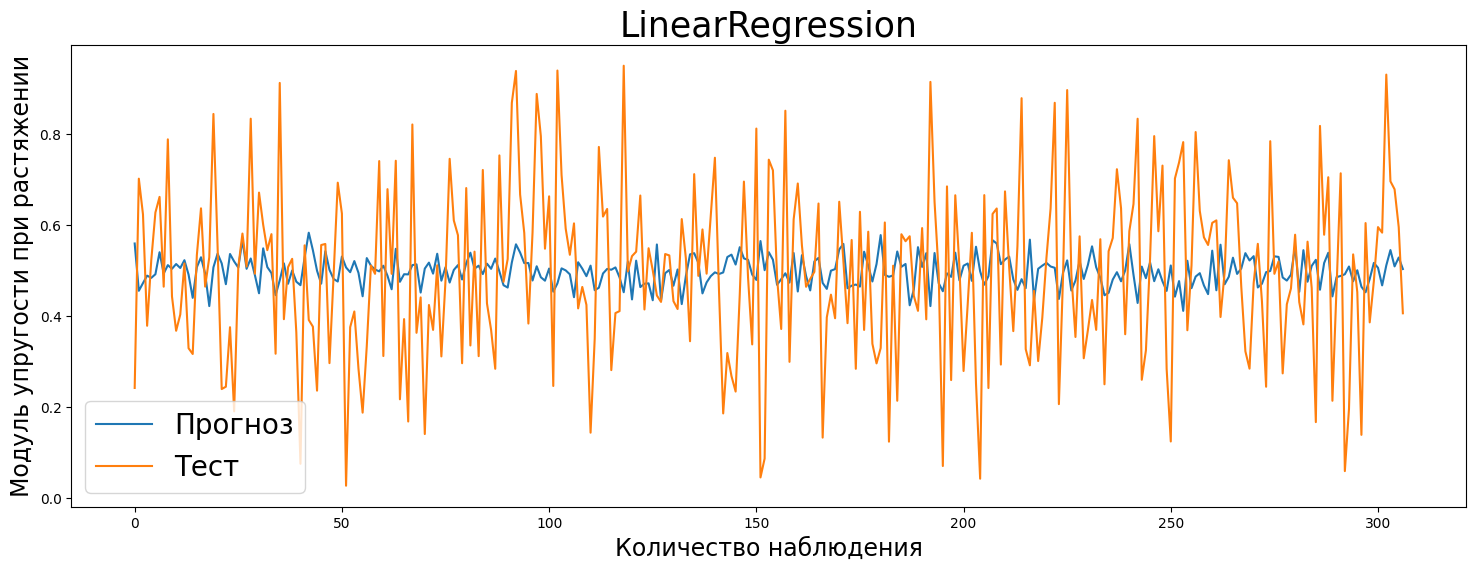

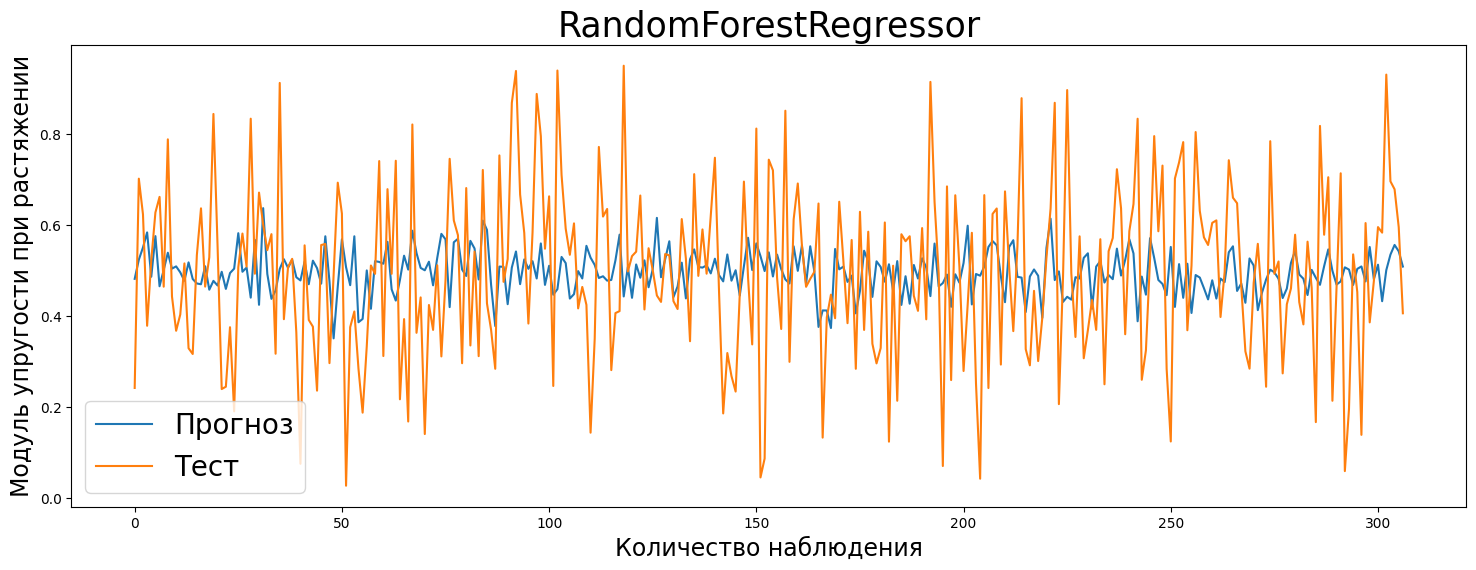

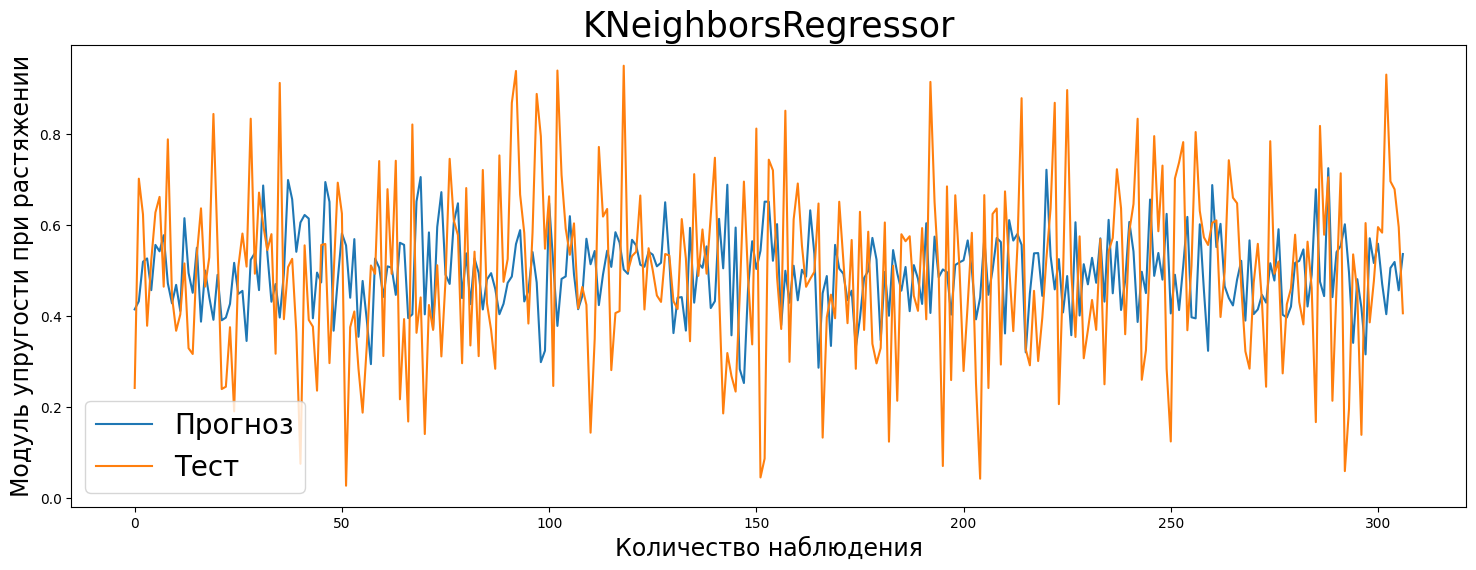

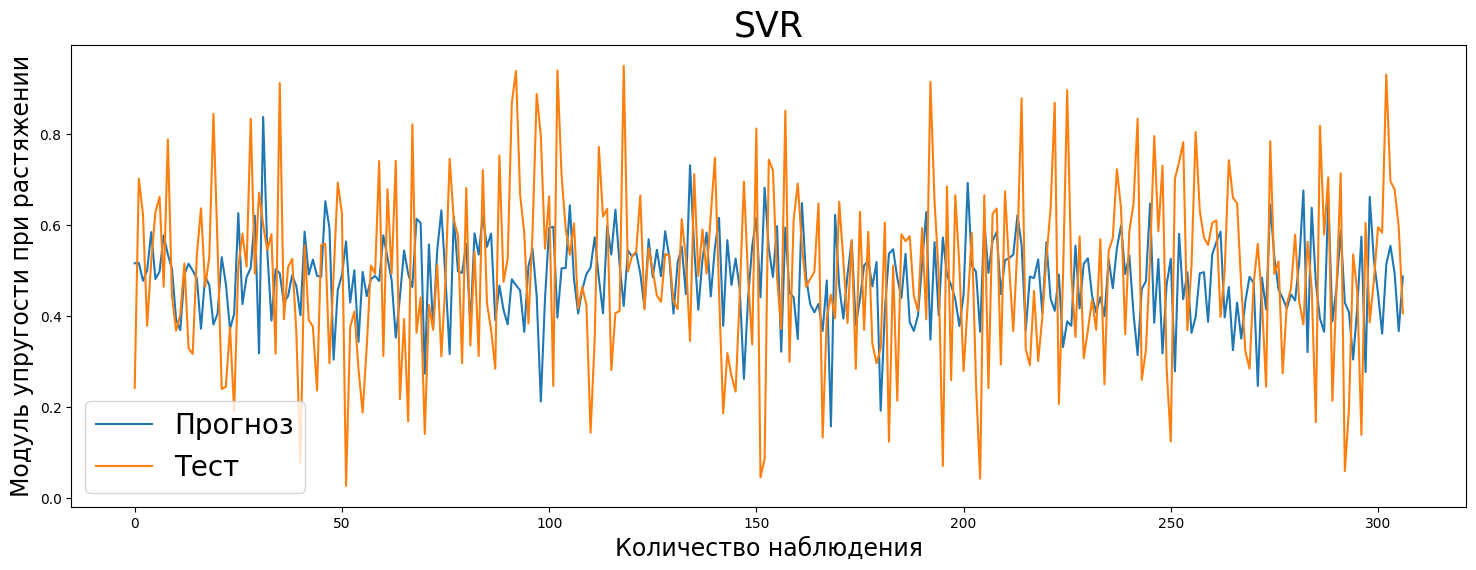

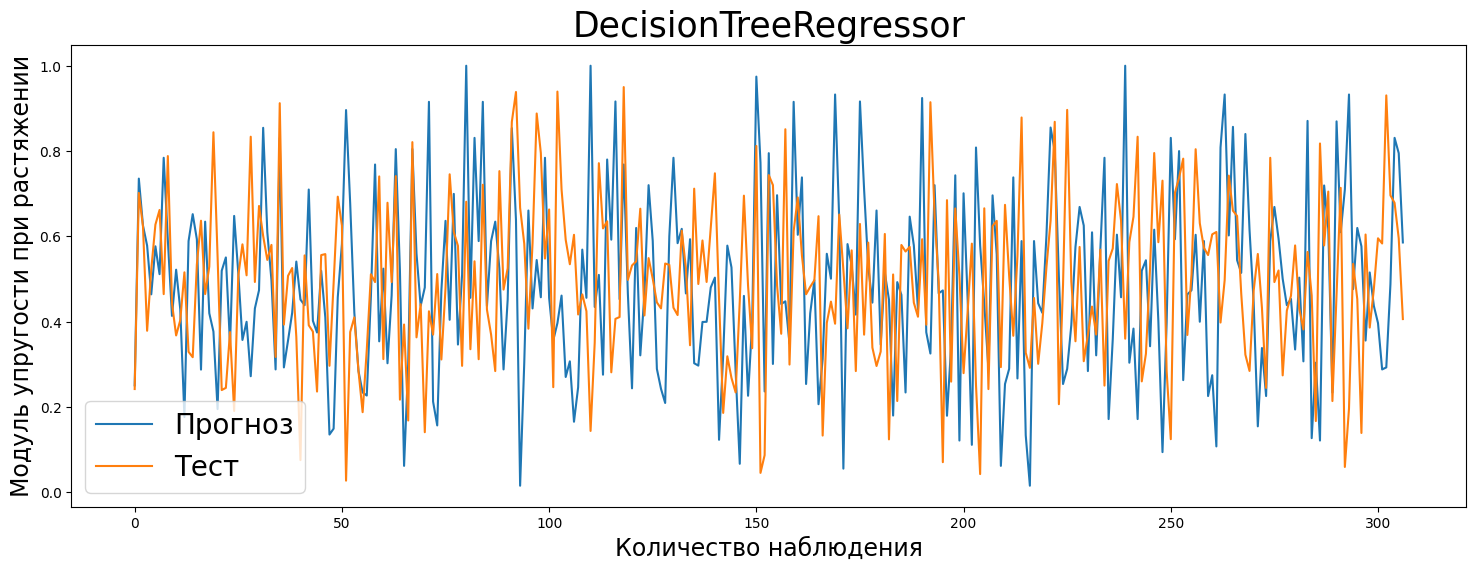

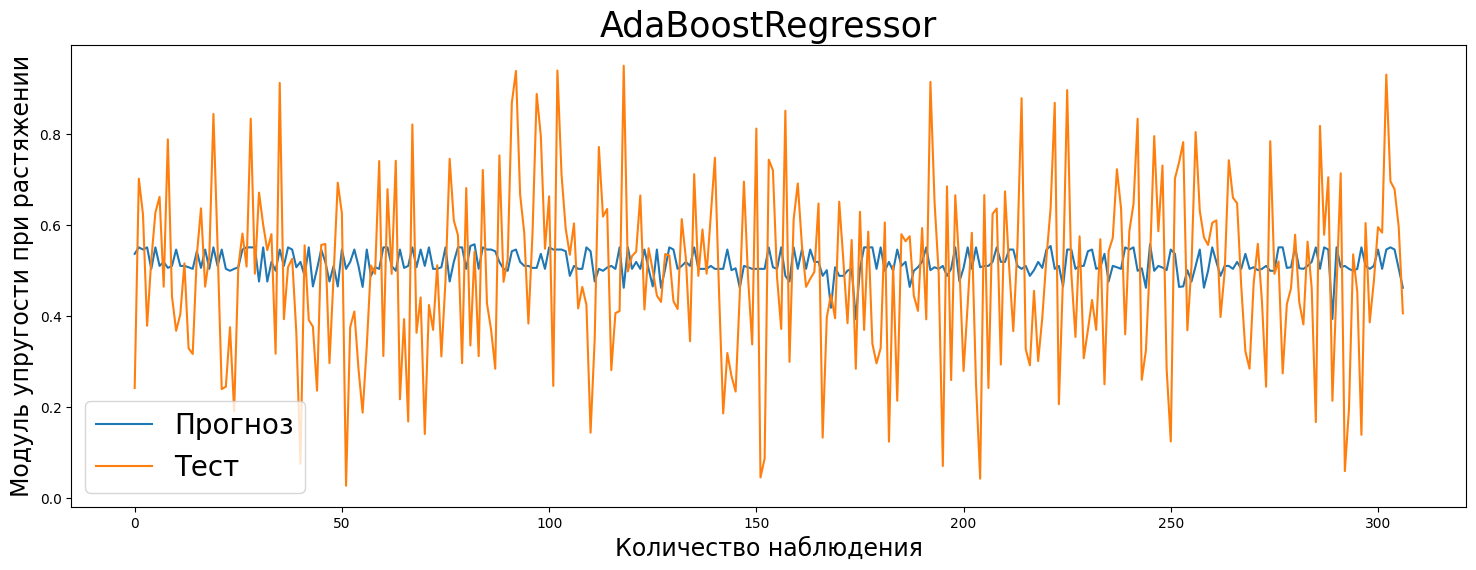

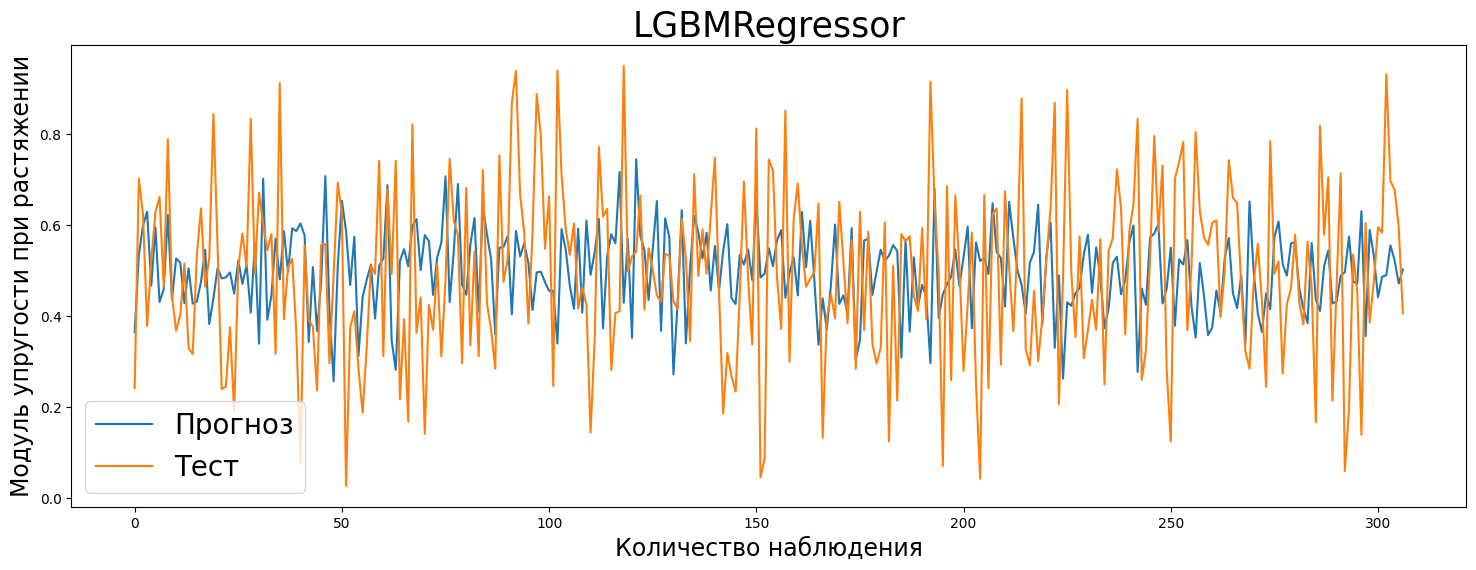

In [17]:
# Запускаем функцию визуализации
target="Модуль упругости при растяжении"
img(models_list, X_train_upr, y_train_upr, X_test_upr, y_test_upr, models_name_list)

C:\Users\admin\AppData\Local\Temp\ipykernel_9180\557444716.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i.fit(X_train, y_train)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


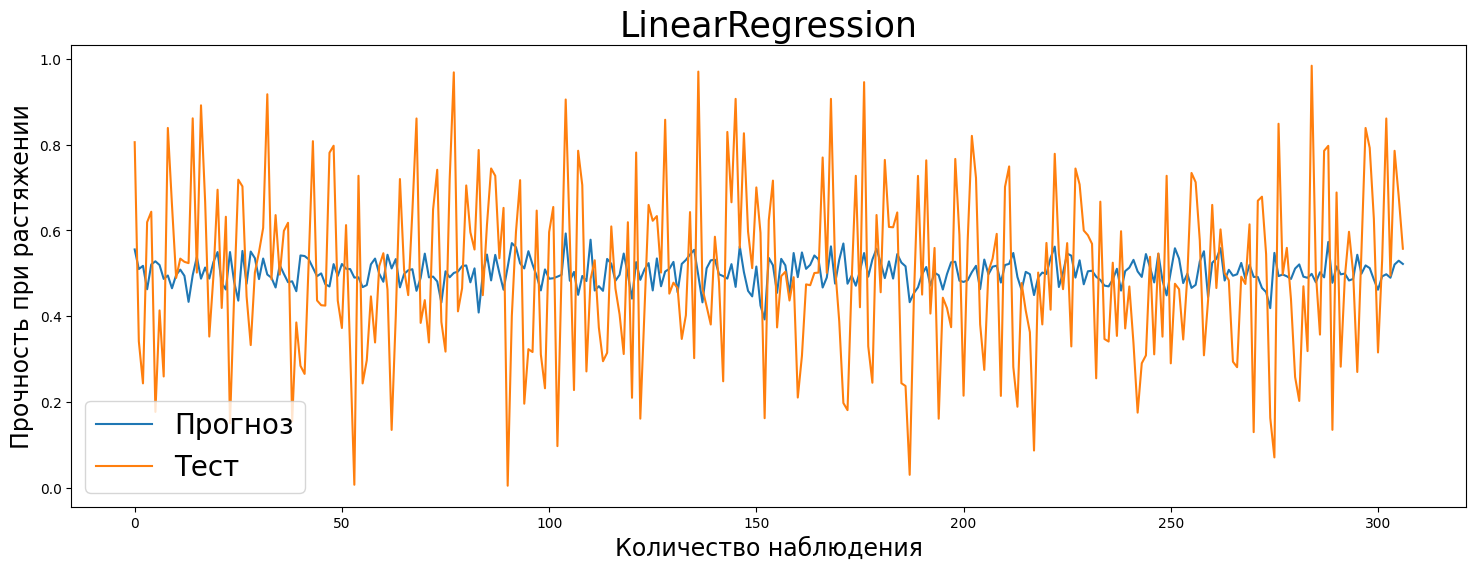

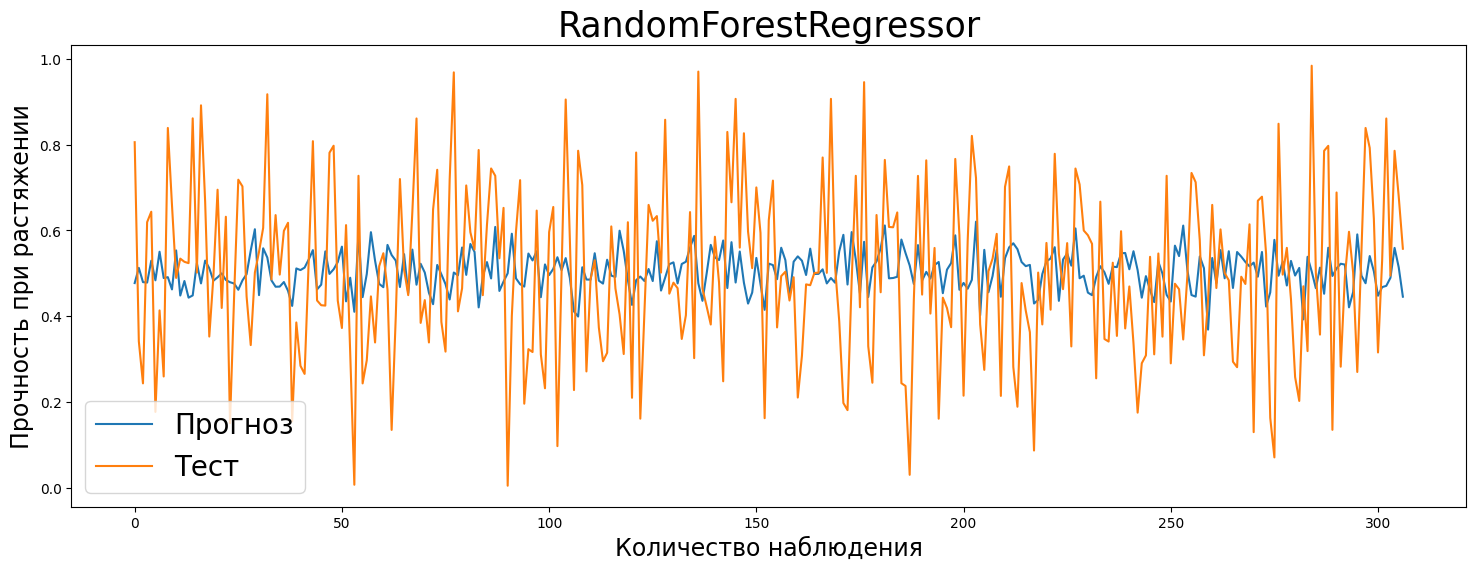

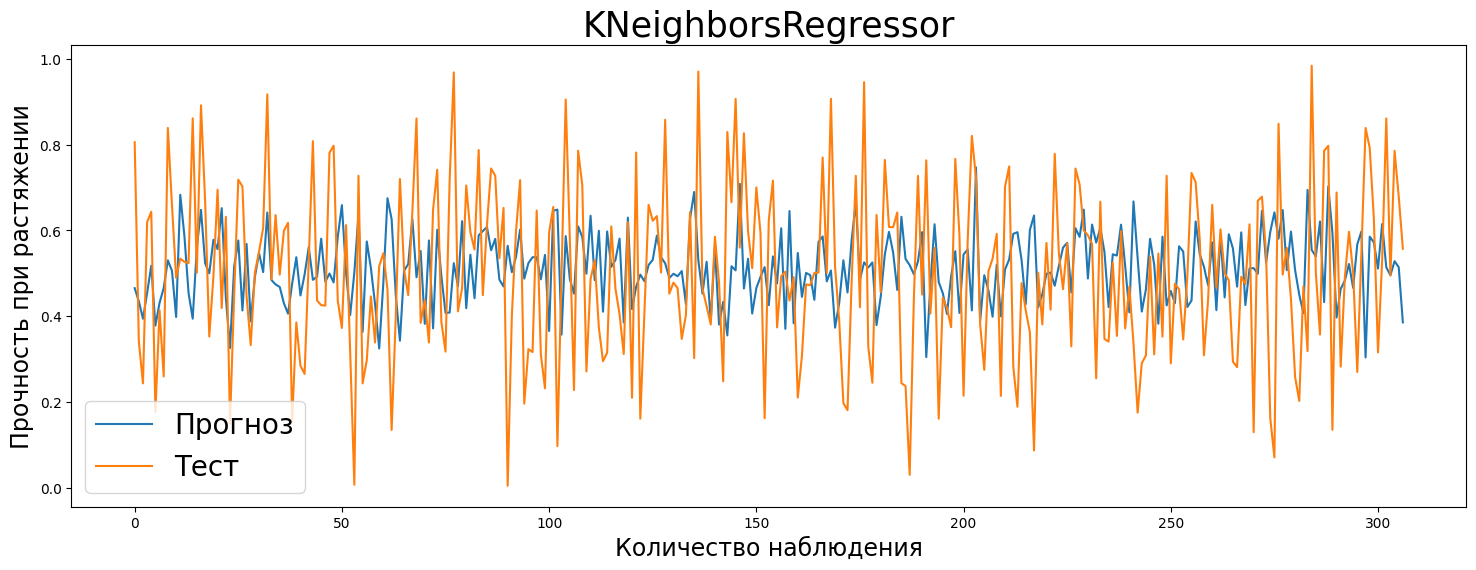

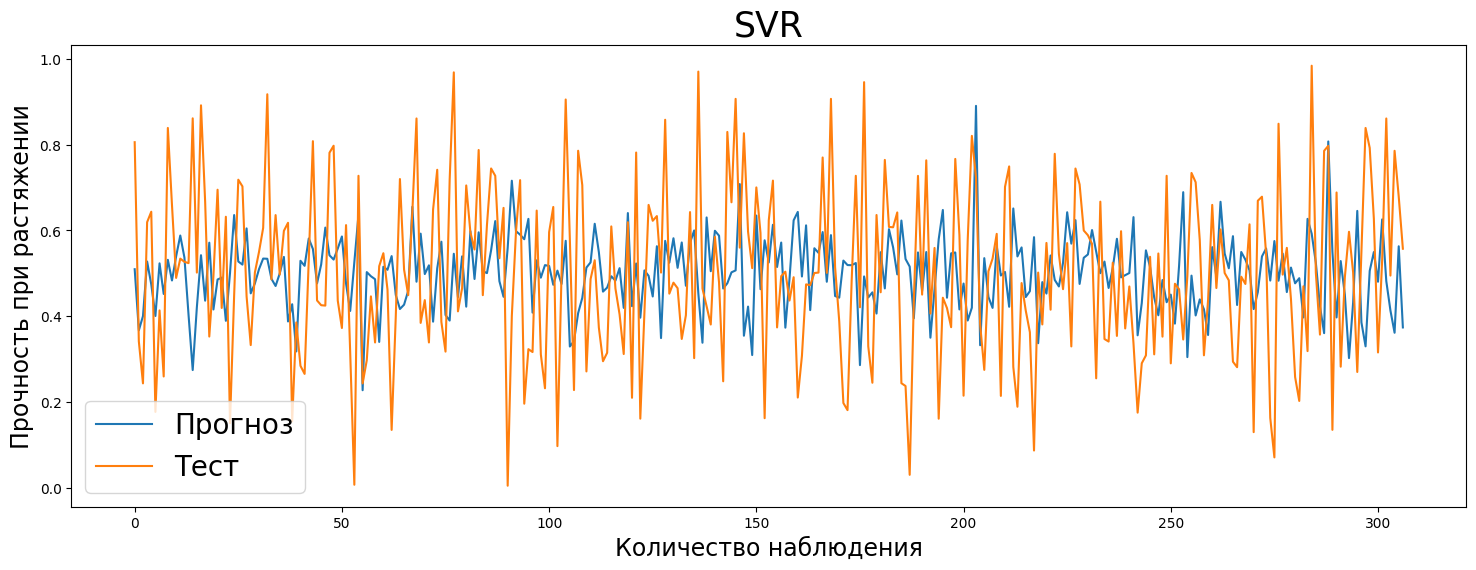

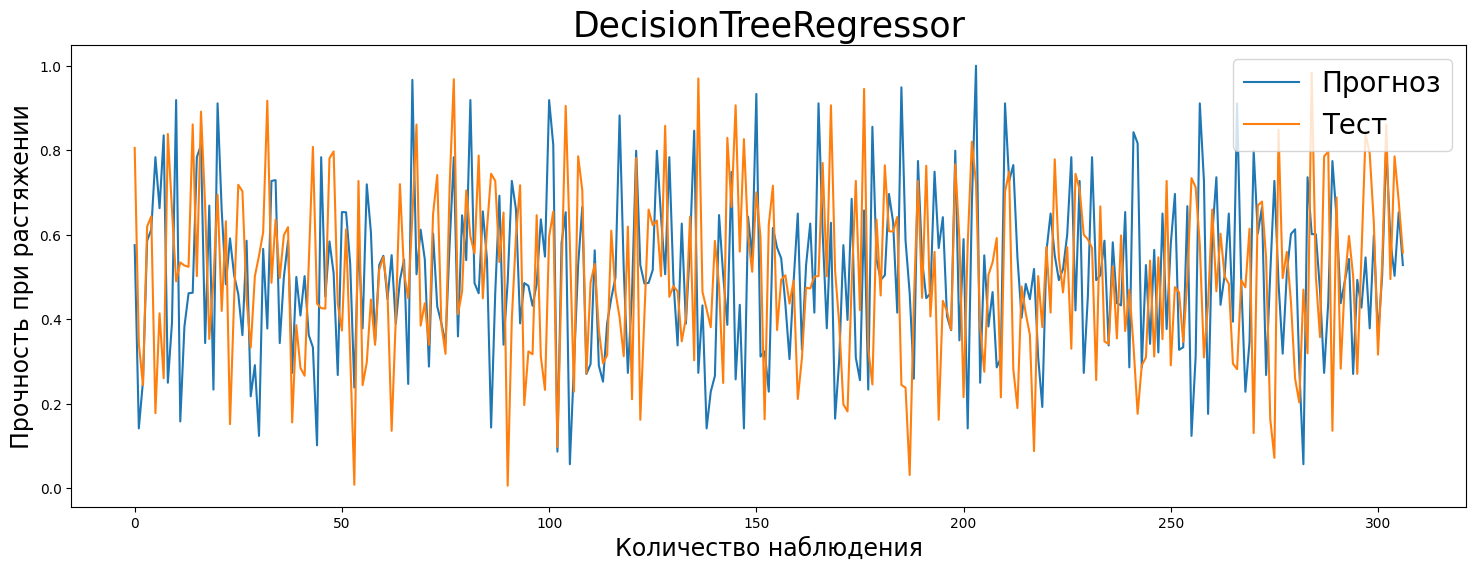

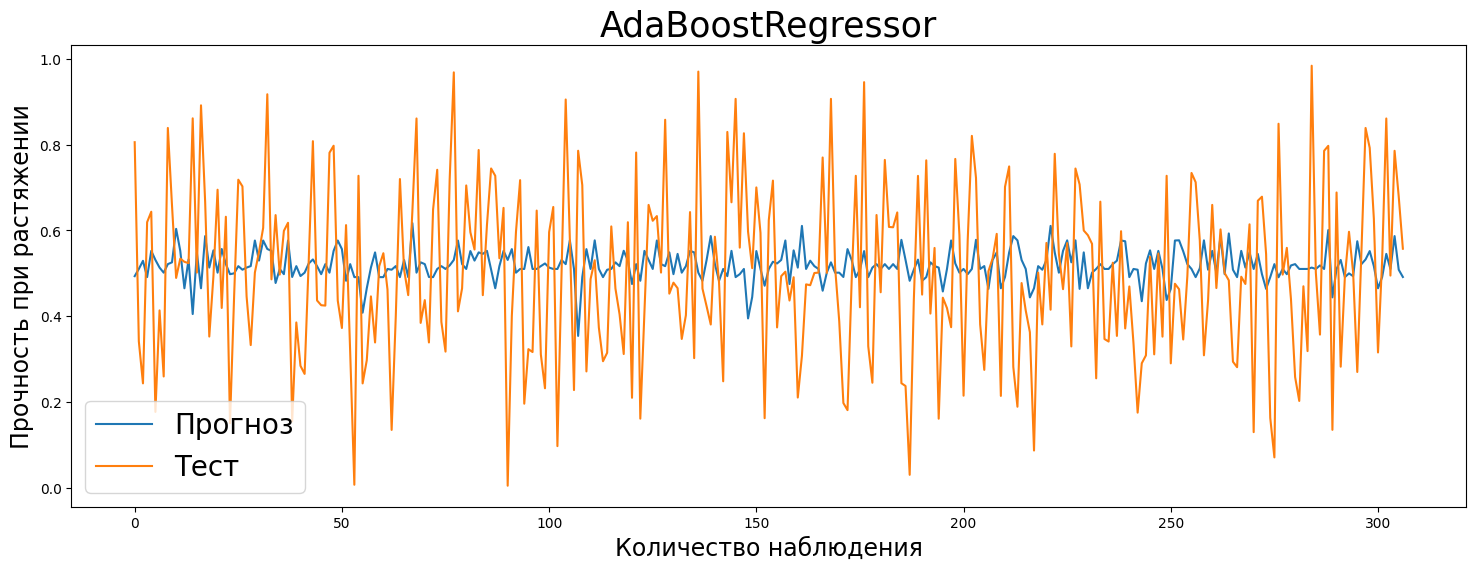

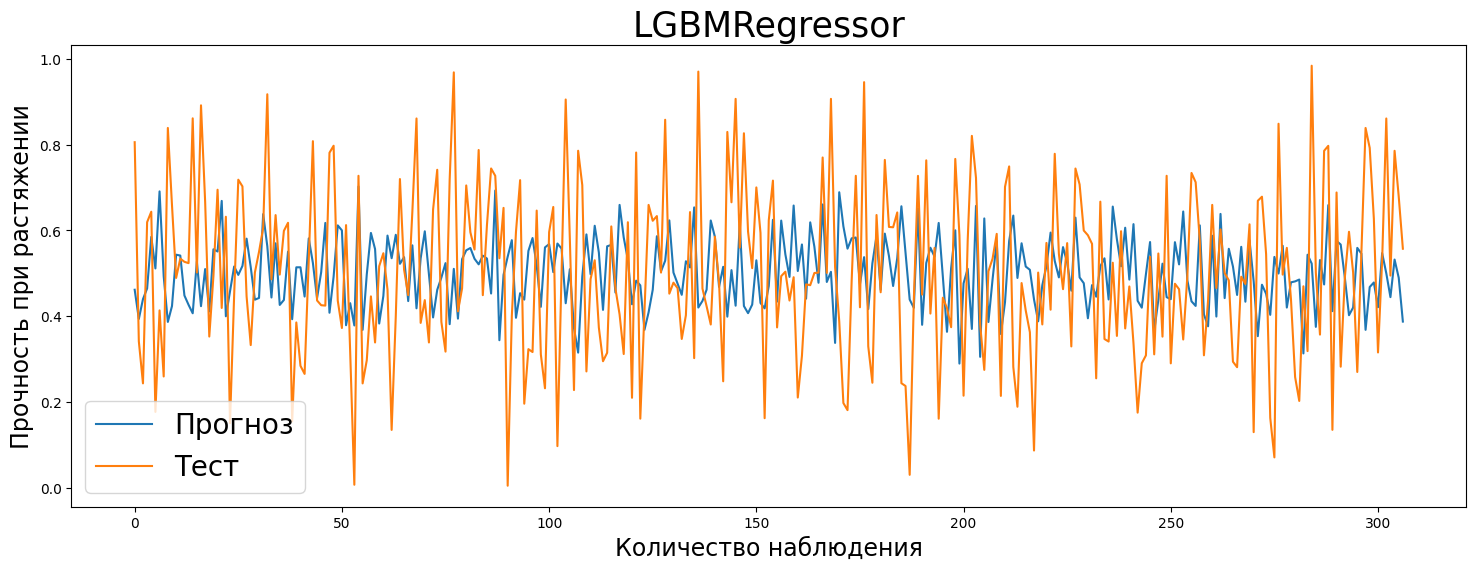

In [18]:
# Запускаем функцию визуализации для "Прочность при растяжении"
target="Прочность при растяжении"
img(models_list, X_train_pr, y_train_pr, X_test_pr, y_test_pr, models_name_list)

### Подбирем лучшие параметры для моделей

используем метод GridSearchCV - поиск гиперпараметров по сетке с перекрестной проверкой, количество блоков равно 10 (CV = 10)

In [19]:
# Составим словари с параметрами для моделей, а так же составляем список из этих словарей
lr_param = {'fit_intercept': [True, False]}

rf_param = {'n_estimators': [30, 64, 100, 128, 140, 200],
            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'max_features': ['sqrt', 'log2', None],
           }

knn_param = {'n_neighbors' : range(1, 301, 2),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

svr_param = {'C': [0.01, 0.1, 0.5, 1],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

dtr_param = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'splitter': ['best', 'random'],
             'max_depth': [1, 5, 10, 15, 20],
             'min_samples_split': [100, 200, 300],
             'min_samples_leaf': [200, 300, 40],
             'max_features': ['auto', 'sqrt', 'log2']
            }

abr_param = {'n_estimators': [6, 8, 10, 20, 50, 100],
            'learning_rate': [0.01, 0.1, 0.5, 1],
            'loss': ['linear', 'square', 'exponential']
            }
lgbm_param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
}
list_param = [lr_param, rf_param, knn_param, svr_param, dtr_param, abr_param, lgbm_param]

### «Модуль упругости при растяжении»

In [20]:
# Пишем функцию вывода лучших параметров моделей
def best_param(models_list, list_param, X_train, y_train):
    k = 0
    for i in models_list:
        model_gs = GridSearchCV(estimator=i,
                                param_grid=list_param[k],
                                n_jobs=-1,
                                cv=10
                               ).fit(X_train,y_train)
        k += 1
        print(f'{i} - {model_gs.best_params_}')

In [21]:
# Запускаем функцию поиска наилучших параметров для Модуля упругости при растяжении
best_param(models_list, list_param, X_train_upr, y_train_upr)

LinearRegression() - {'fit_intercept': True}


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestRegressor() - {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 30}
KNeighborsRegressor() - {'algorithm': 'auto', 'n_neighbors': 139, 'weights': 'uniform'}


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR() - {'C': 0.01, 'kernel': 'rbf'}


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor() - {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 200, 'min_samples_split': 300, 'splitter': 'random'}


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor() - {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 8}
LGBMRegressor() - {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 50, 'subsample': 0.5}


In [22]:
# Запускаем функцию поиска наилучших параметров для Прочности при растяжении
best_param(models_list, list_param, X_train_pr, y_train_pr)

LinearRegression() - {'fit_intercept': True}


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestRegressor() - {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
KNeighborsRegressor() - {'algorithm': 'auto', 'n_neighbors': 231, 'weights': 'uniform'}


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR() - {'C': 0.01, 'kernel': 'rbf'}
DecisionTreeRegressor() - {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 300, 'min_samples_split': 100, 'splitter': 'best'}


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor() - {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 6}
LGBMRegressor() - {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.5}


In [23]:
# Создадим модели с подобранными для них параметрами, и составим список из этих моделей для "Модуля упругости"
lr_upr = LinearRegression(fit_intercept=True)
rf_upr = RandomForestRegressor(max_depth=1, max_features='sqrt', n_estimators=30)
knn_upr = KNeighborsRegressor(algorithm='auto', n_neighbors=139, weights='uniform')
svr_upr = SVR(C=0.01, kernel='rbf')
dtr_upr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=1, max_features='auto',
                               min_samples_leaf=200, min_samples_split=300, splitter='random')
abr_upr = AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=8)
lgbm_upr=LGBMRegressor(colsample_bytree=0.5,learning_rate=0.01,max_depth=9,n_estimators=50,subsample=0.5)
gs_list_upr = [lr_upr, rf_upr, knn_upr, svr_upr, dtr_upr, abr_upr,lgbm_upr]

In [30]:
target='Модуль упругости при растяжении (с подбором параметров)'
metrics(gs_list_upr, models_name_list, X_train_upr, y_train_upr, X_test_upr, y_test_upr)

C:\Users\admin\AppData\Local\Temp\ipykernel_9180\3979709020.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i.fit(X_train, y_train)    #обучение модели
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

target                  model  \
0                     Модуль упругости при растяжении       LinearRegression   
1                     Модуль упругости при растяжении  RandomForestRegressor   
2                     Модуль упругости при растяжении    KNeighborsRegressor   
3                     Модуль упругости при растяжении                    SVR   
4                     Модуль упругости при растяжении  DecisionTreeRegressor   
5                     Модуль упругости при растяжении      AdaBoostRegressor   
6                     Модуль упругости при растяжении          LGBMRegressor   
7                            Прочность при растяжении       LinearRegression   
8                            Прочность при растяжении  RandomForestRegressor   
9                            Прочность при растяжении    KNeighborsRegressor   
10                           Прочность при растяжении                    SVR   
11                           Прочность при растяжении  DecisionTreeRegressor   
12                           Прочность при растяжении      AdaBoostRegressor   
13                           Прочность при растяжении          LGBMRegressor   
14  Модуль упругости при растяжении (с подбором па...       LinearRegression   
15  Модуль упругости при растяжении (с подбором па...  RandomForestRegressor   
16  Модуль упругости при растяжении (с подбором па...    KNeighborsRegressor   
17  Модуль упругости при растяжении (с подбором па...                    SVR   
18  Модуль упругости при растяжении (с подбором па...  DecisionTreeRegressor   
19  Модуль упругости при растяжении (с подбором па...      AdaBoostRegressor   
20  Модуль упругости при растяжении (с подбором па...          LGBMRegressor   

      MAE    MSE   MAPE   RMSE     R2  score  
0   0.155  0.037  0.575  0.194 -0.041  0.027  
1   0.155  0.038  0.573  0.194 -0.049  0.857  
2   0.169  0.045  0.608  0.213 -0.257  0.182  
3   0.172  0.046  0.588  0.216 -0.292  0.475  
4   0.219  0.077  0.759  0.277 -1.138  1.000  
5   0.154  0.038  0.607  0.194 -0.047  0.114  
6   0.171  0.046  0.615  0.214 -0.269  0.944  
7   0.162  0.040  0.965  0.200 -0.010  0.025  
8   0.163  0.040  0.934  0.200 -0.017  0.855  
9   0.168  0.045  1.037  0.211 -0.128  0.216  
10  0.174  0.046  1.042  0.215 -0.164  0.509  
11  0.224  0.079  1.031  0.281 -0.998  1.000  
12  0.164  0.040  0.965  0.201 -0.023  0.183  
13  0.174  0.046  0.958  0.215 -0.164  0.951  
14  0.155  0.037  0.575  0.194 -0.041  0.027  
15  0.152  0.036  0.563  0.189  0.004  0.017  
16  0.152  0.036  0.565  0.190 -0.000  0.018  
17  0.151  0.036  0.561  0.190 -0.002  0.045  
18  0.153  0.037  0.568  0.192 -0.020  0.009  
19  0.153  0.036  0.568  0.191 -0.011  0.068  
20  0.151  0.036  0.563  0.189  0.006  0.136

In [32]:
# Создадим модели с подобранными для них параметрами, и составим список из этих моделей для "прочности при растяжении"
lr_pr = LinearRegression(fit_intercept=True)
rf_pr = RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=100)
knn_pr = KNeighborsRegressor(algorithm='auto', n_neighbors=231, weights='uniform')
svr_pr = SVR(C=0.01, kernel='rbf')
dtr_pr = DecisionTreeRegressor(criterion='squared_error', max_depth=1, max_features='log2',
                               min_samples_leaf=300, min_samples_split=100, splitter='best')
abr_pr = AdaBoostRegressor(learning_rate=0.5, loss='exponential', n_estimators=6)
lgbm_pr=LGBMRegressor(colsample_bytree=0.5,learning_rate=0.01,max_depth=6,n_estimators=50,subsample=0.5)
gs_list_pr = [lr_pr, rf_pr, knn_pr, svr_pr, dtr_pr, abr_pr,lgbm_pr]

In [33]:
target='Прочность при растяжении (с подбором параметров)'
metrics(gs_list_pr, models_name_list, X_train_pr, y_train_pr, X_test_pr, y_test_pr)

C:\Users\admin\AppData\Local\Temp\ipykernel_9180\3979709020.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i.fit(X_train, y_train)    #обучение модели
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


target                  model  \
0                     Модуль упругости при растяжении       LinearRegression   
1                     Модуль упругости при растяжении  RandomForestRegressor   
2                     Модуль упругости при растяжении    KNeighborsRegressor   
3                     Модуль упругости при растяжении                    SVR   
4                     Модуль упругости при растяжении  DecisionTreeRegressor   
5                     Модуль упругости при растяжении      AdaBoostRegressor   
6                     Модуль упругости при растяжении          LGBMRegressor   
7                            Прочность при растяжении       LinearRegression   
8                            Прочность при растяжении  RandomForestRegressor   
9                            Прочность при растяжении    KNeighborsRegressor   
10                           Прочность при растяжении                    SVR   
11                           Прочность при растяжении  DecisionTreeRegressor   
12                           Прочность при растяжении      AdaBoostRegressor   
13                           Прочность при растяжении          LGBMRegressor   
14  Модуль упругости при растяжении (с подбором па...       LinearRegression   
15  Модуль упругости при растяжении (с подбором па...  RandomForestRegressor   
16  Модуль упругости при растяжении (с подбором па...    KNeighborsRegressor   
17  Модуль упругости при растяжении (с подбором па...                    SVR   
18  Модуль упругости при растяжении (с подбором па...  DecisionTreeRegressor   
19  Модуль упругости при растяжении (с подбором па...      AdaBoostRegressor   
20  Модуль упругости при растяжении (с подбором па...          LGBMRegressor   
21   Прочность при растяжении (с подбором параметров)       LinearRegression   
22   Прочность при растяжении (с подбором параметров)  RandomForestRegressor   
23   Прочность при растяжении (с подбором параметров)    KNeighborsRegressor   
24   Прочность при растяжении (с подбором параметров)                    SVR   
25   Прочность при растяжении (с подбором параметров)  DecisionTreeRegressor   
26   Прочность при растяжении (с подбором параметров)      AdaBoostRegressor   
27   Прочность при растяжении (с подбором параметров)          LGBMRegressor   

      MAE    MSE   MAPE   RMSE     R2  score  
0   0.155  0.037  0.575  0.194 -0.041  0.027  
1   0.155  0.038  0.573  0.194 -0.049  0.857  
2   0.169  0.045  0.608  0.213 -0.257  0.182  
3   0.172  0.046  0.588  0.216 -0.292  0.475  
4   0.219  0.077  0.759  0.277 -1.138  1.000  
5   0.154  0.038  0.607  0.194 -0.047  0.114  
6   0.171  0.046  0.615  0.214 -0.269  0.944  
7   0.162  0.040  0.965  0.200 -0.010  0.025  
8   0.163  0.040  0.934  0.200 -0.017  0.855  
9   0.168  0.045  1.037  0.211 -0.128  0.216  
10  0.174  0.046  1.042  0.215 -0.164  0.509  
11  0.224  0.079  1.031  0.281 -0.998  1.000  
12  0.164  0.040  0.965  0.201 -0.023  0.183  
13  0.174  0.046  0.958  0.215 -0.164  0.951  
14  0.155  0.037  0.575  0.194 -0.041  0.027  
15  0.152  0.036  0.563  0.189  0.004  0.017  
16  0.152  0.036  0.565  0.190 -0.000  0.018  
17  0.151  0.036  0.561  0.190 -0.002  0.045  
18  0.153  0.037  0.568  0.192 -0.020  0.009  
19  0.153  0.036  0.568  0.191 -0.011  0.068  
20  0.151  0.036  0.563  0.189  0.006  0.136  
21  0.162  0.040  0.965  0.200 -0.010  0.025  
22  0.161  0.040  0.960  0.199 -0.002  0.221  
23  0.160  0.040  0.985  0.199 -0.000  0.009  
24  0.160  0.040  0.971  0.199 -0.003  0.042  
25  0.163  0.040  0.975  0.201 -0.018  0.014  
26  0.160  0.039  0.968  0.198  0.004  0.077  
27  0.161  0.039  0.972  0.199  0.002  0.133

C:\Users\admin\AppData\Local\Temp\ipykernel_9180\557444716.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i.fit(X_train, y_train)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

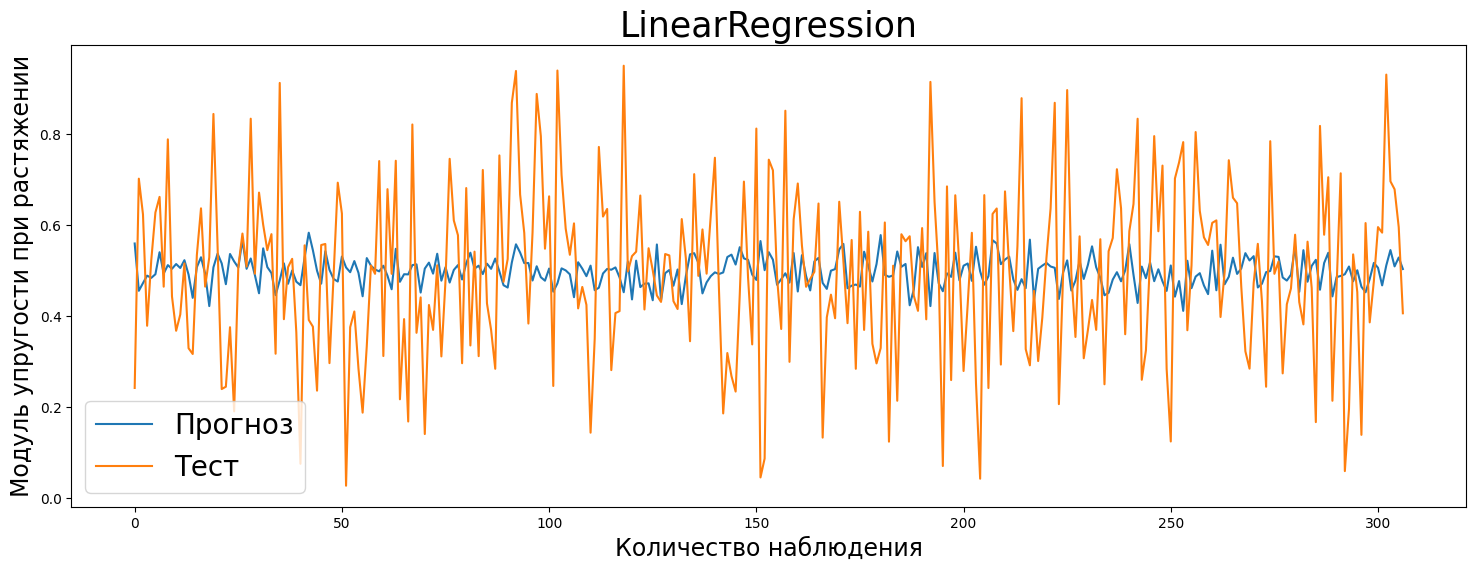

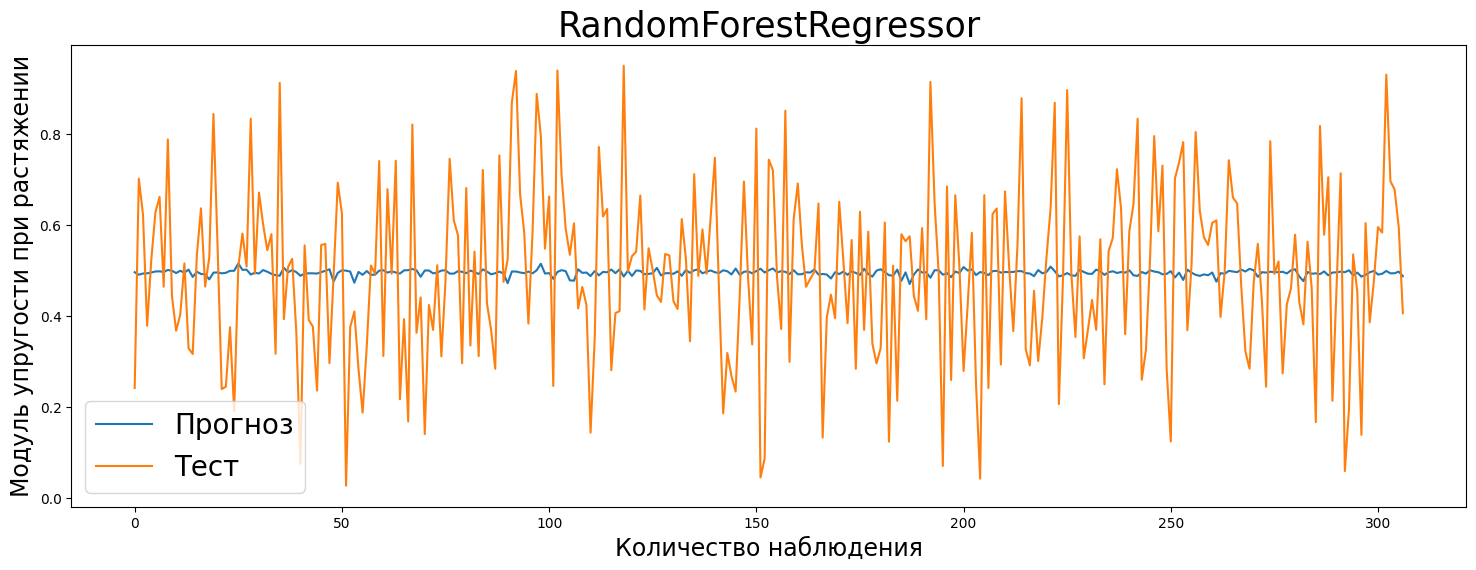

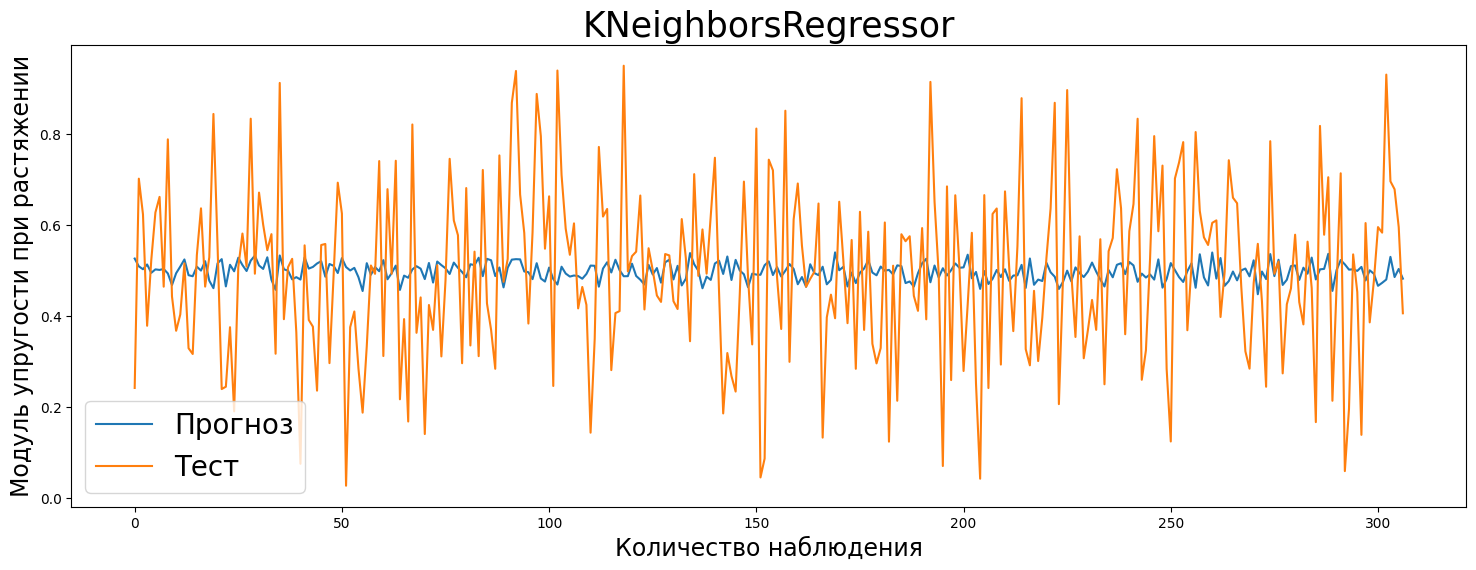

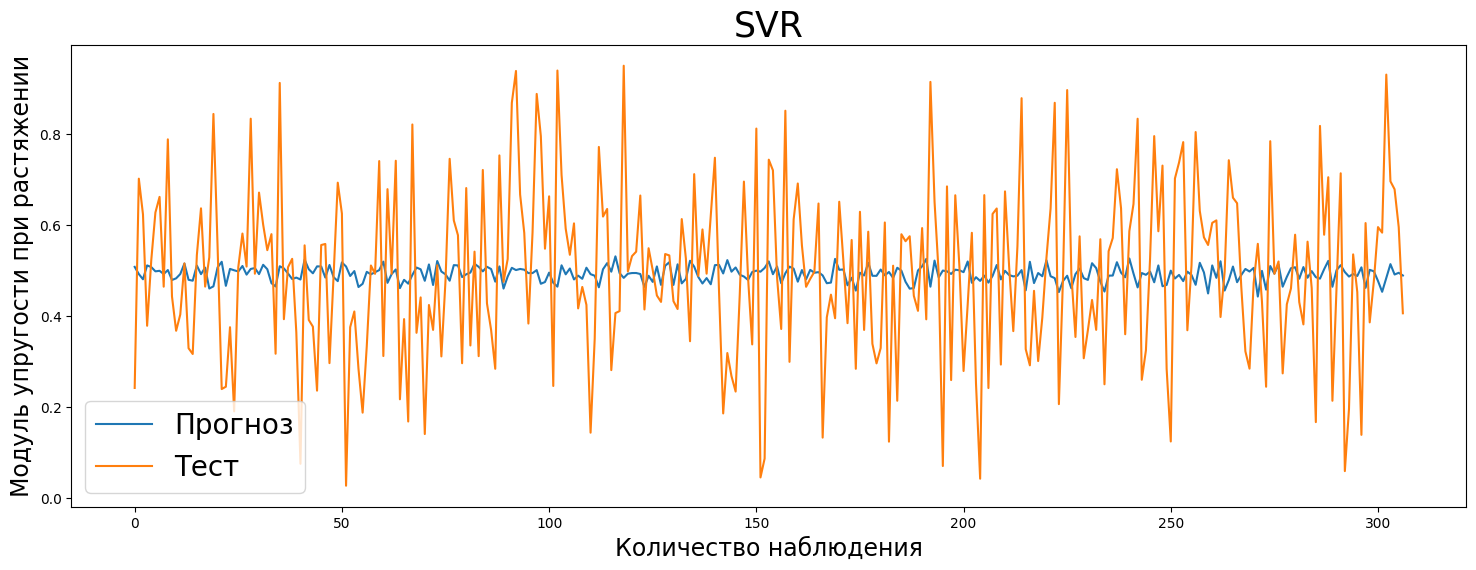

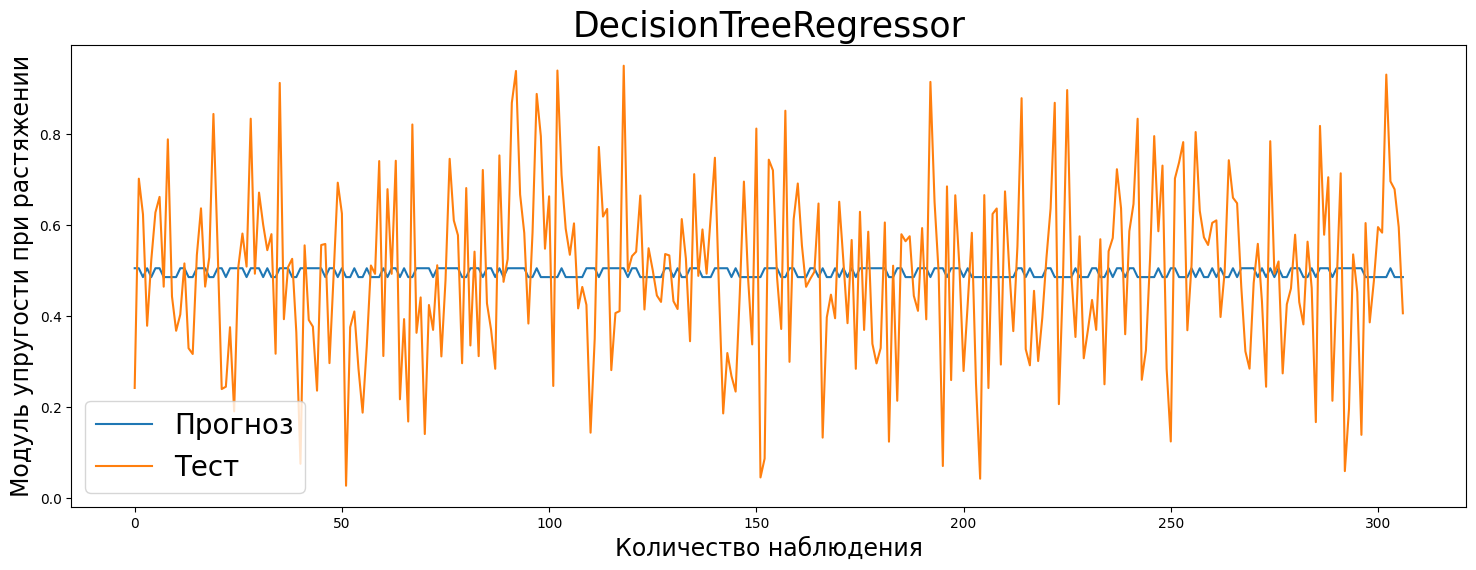

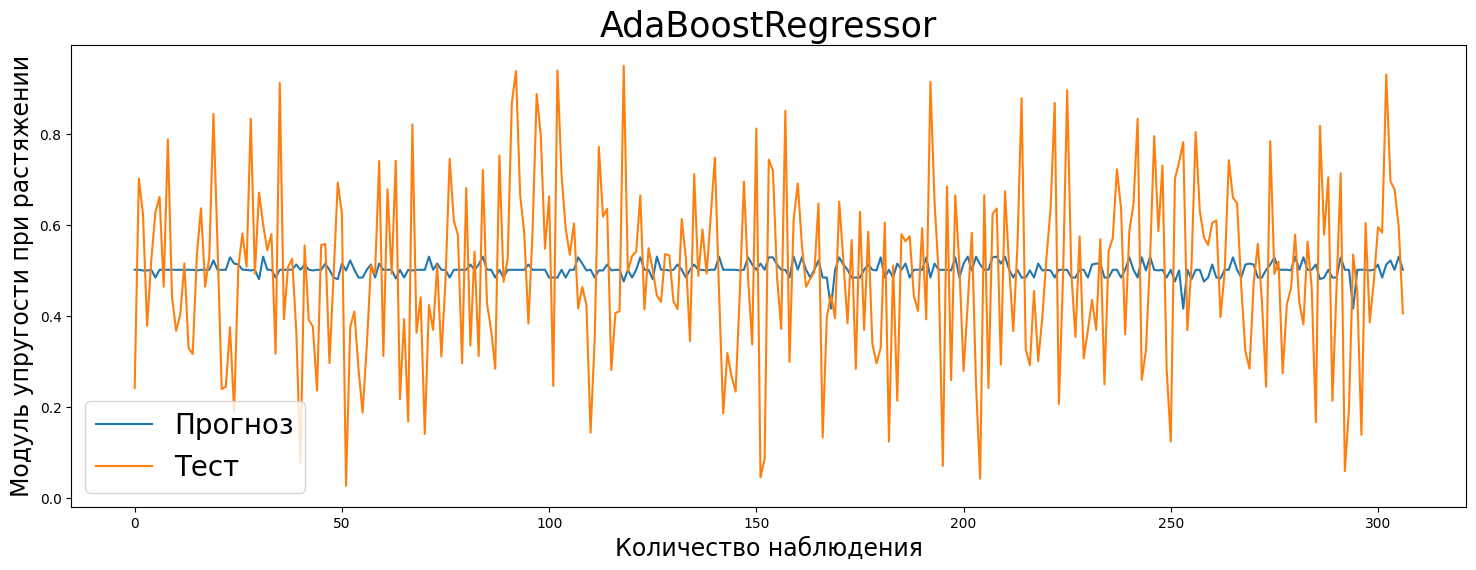

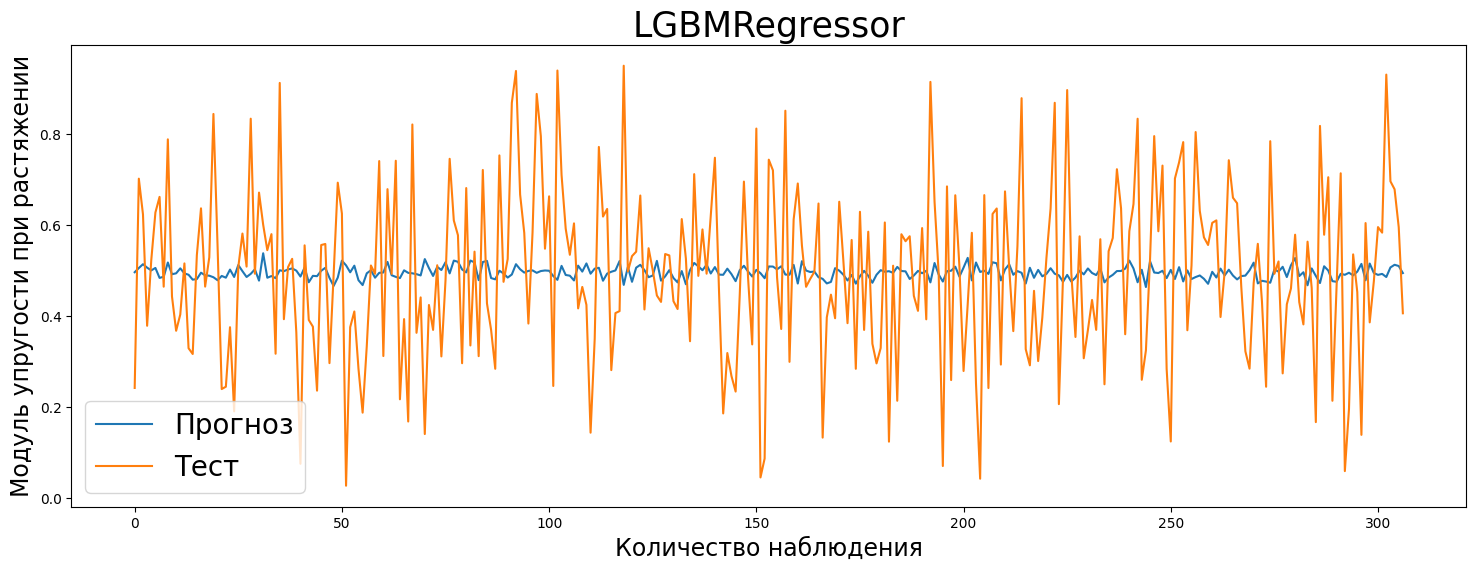

In [34]:
# Запускаем функцию визуализации
target="Модуль упругости при растяжении"
img(gs_list_upr, X_train_upr, y_train_upr, X_test_upr, y_test_upr, models_name_list)

C:\Users\admin\AppData\Local\Temp\ipykernel_9180\557444716.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i.fit(X_train, y_train)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


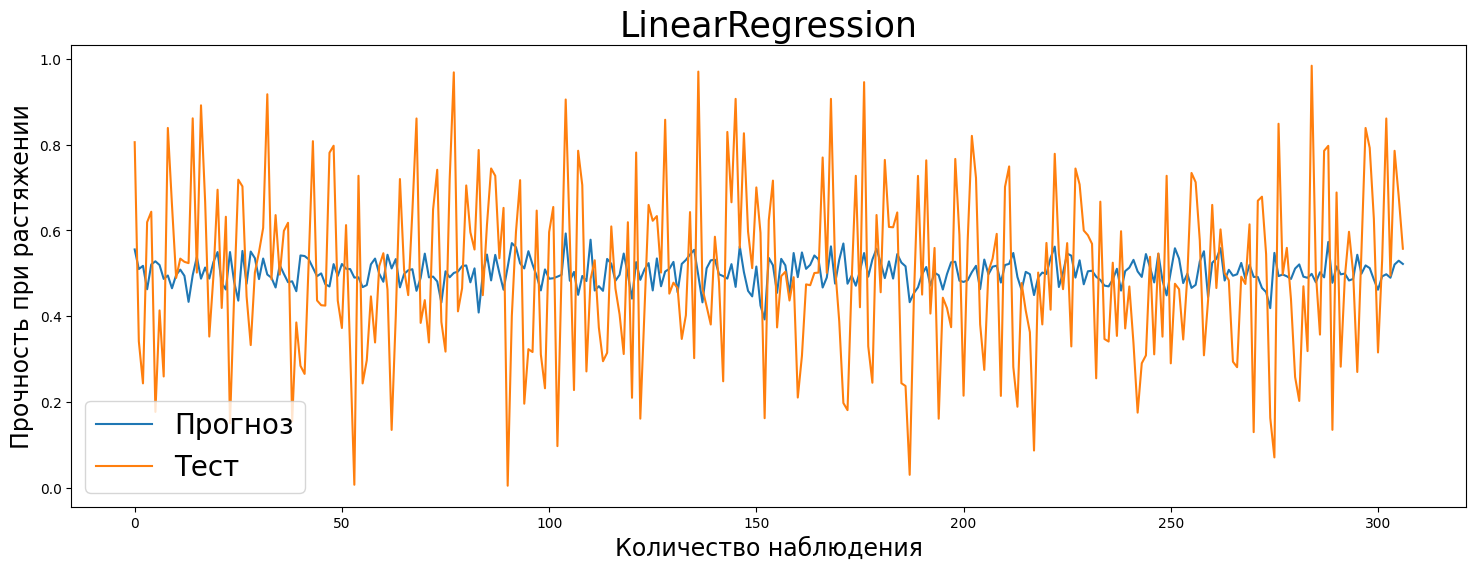

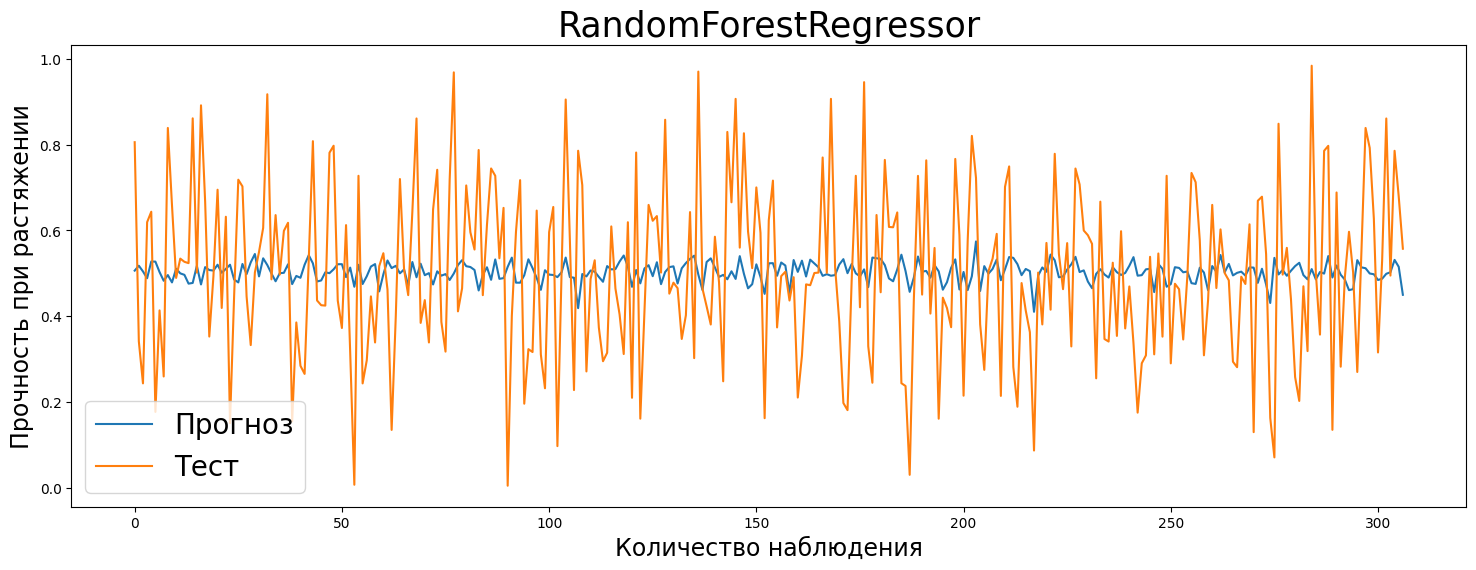

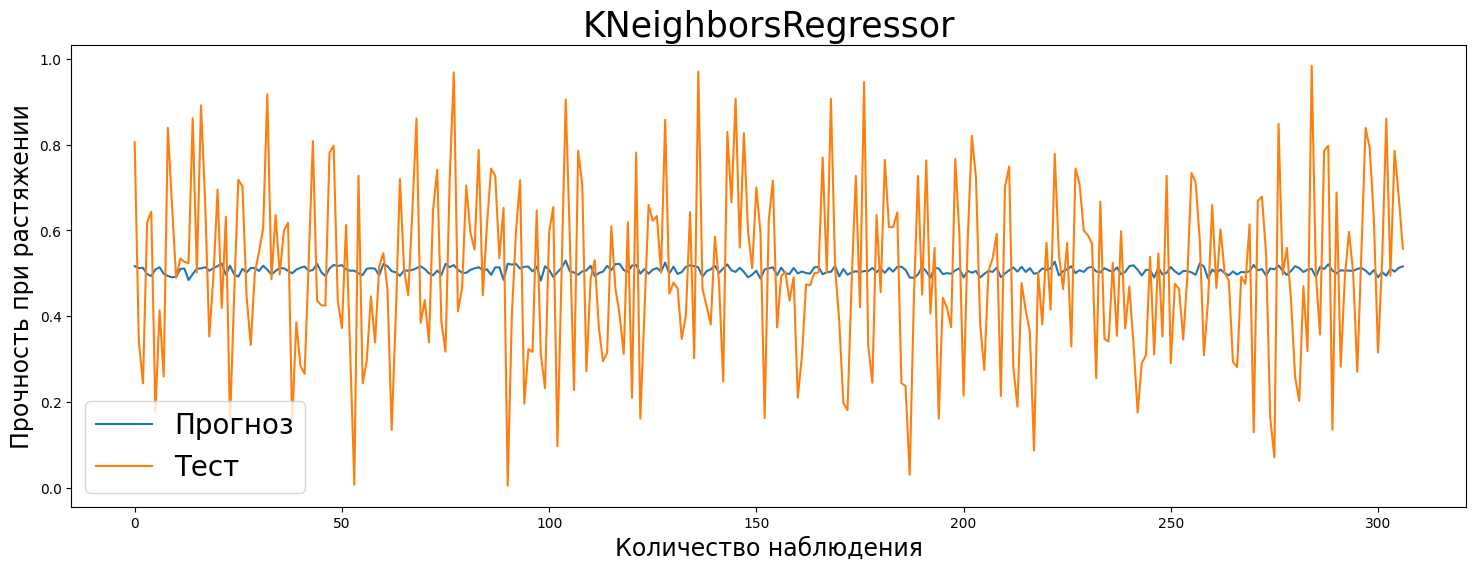

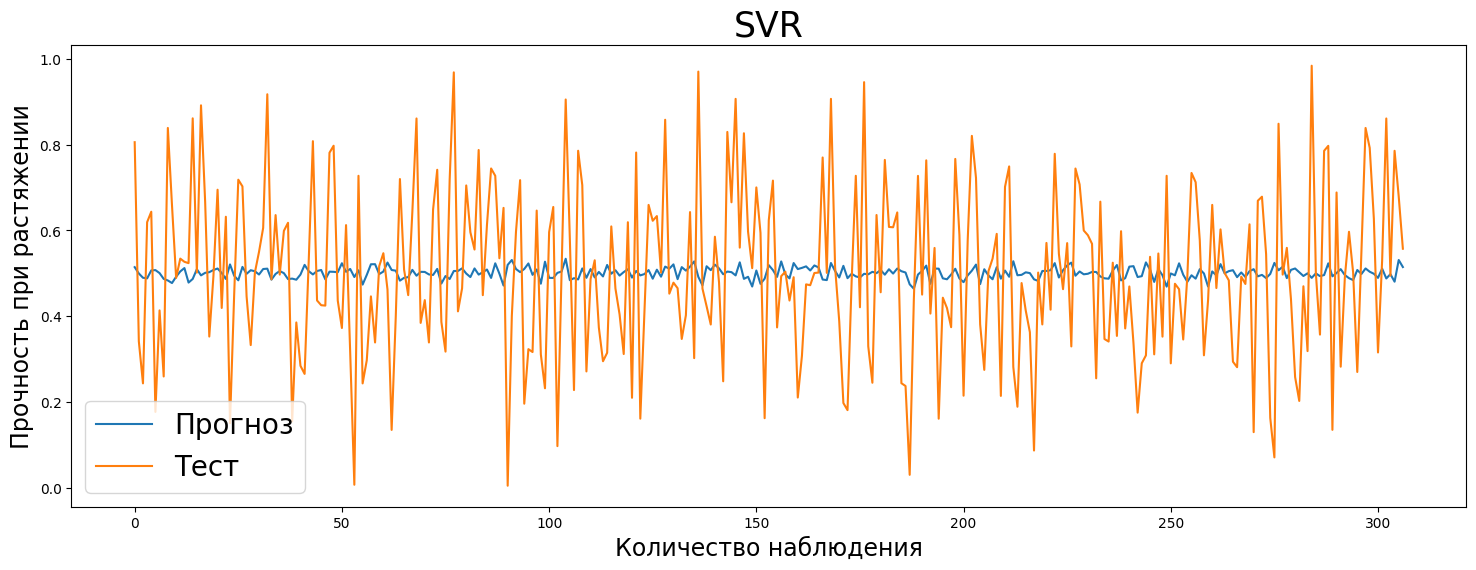

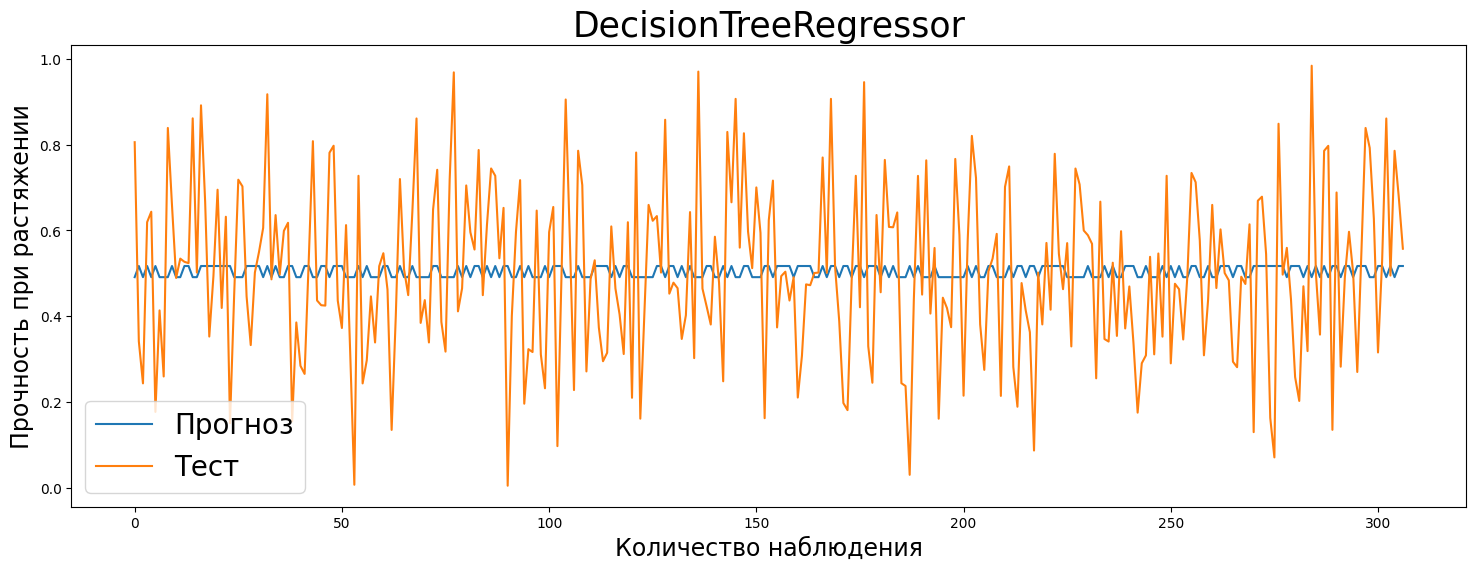

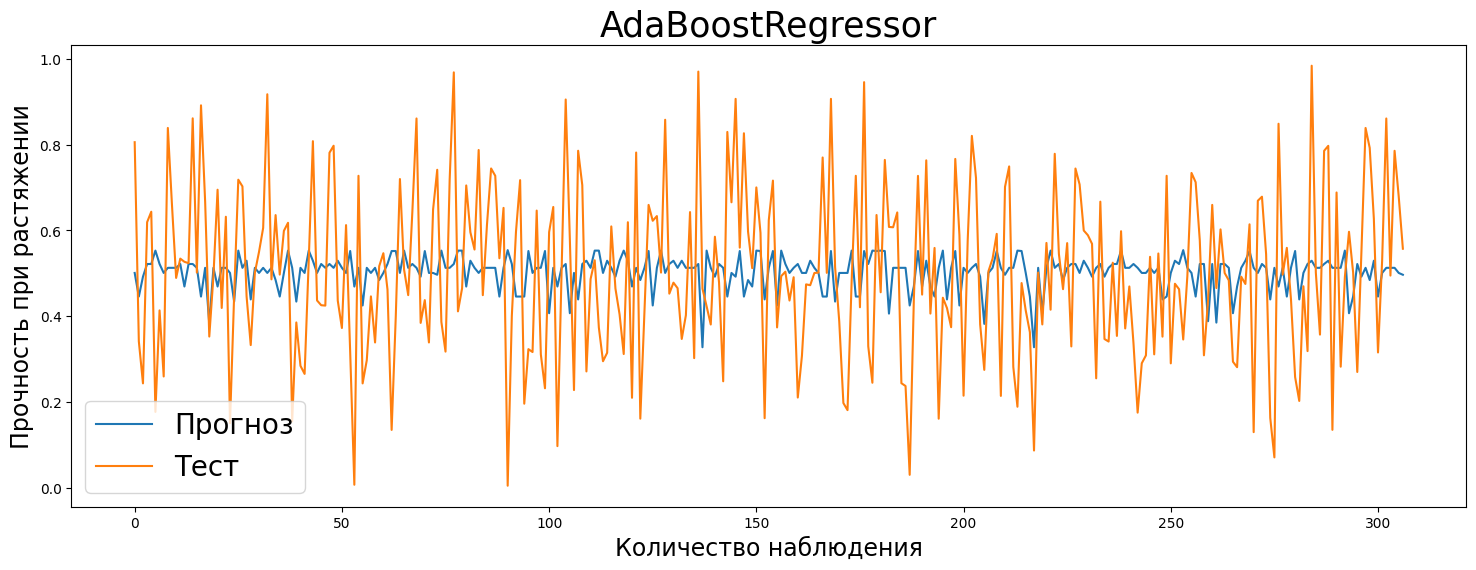

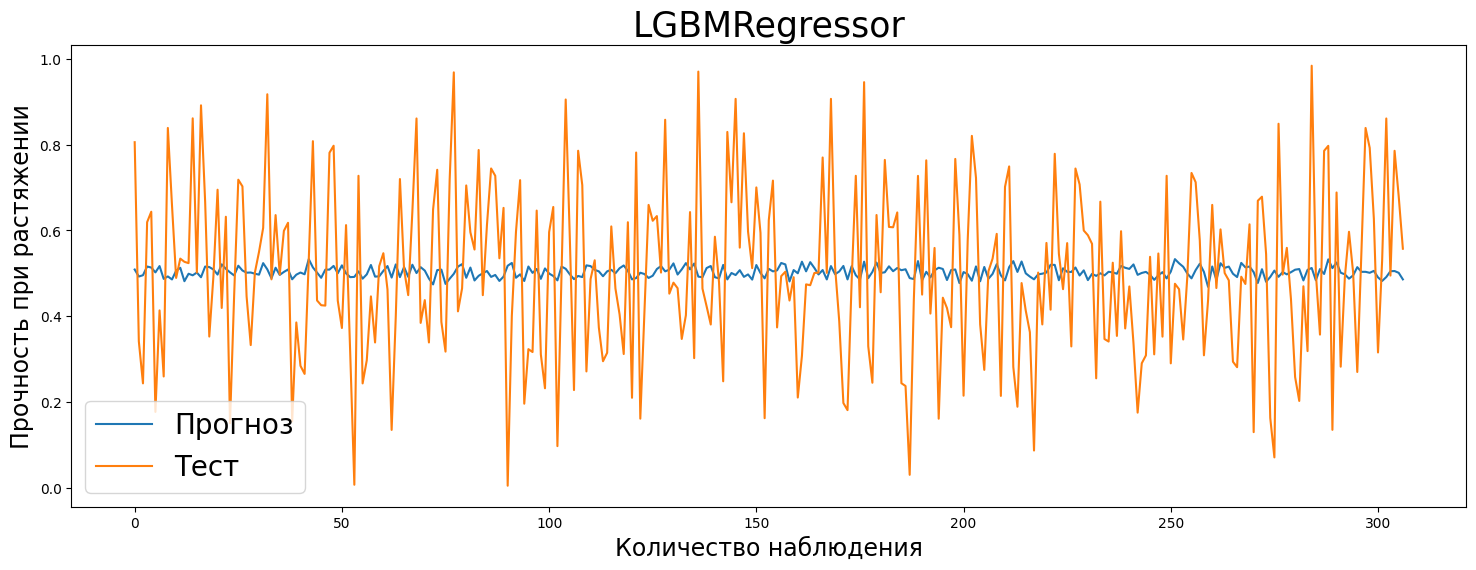

In [35]:
# Запускаем функцию визуализации
target="Прочность при растяжении"
img(gs_list_pr, X_train_pr, y_train_pr, X_test_pr, y_test_pr, models_name_list)

In [36]:
# Лучшая модель по MAE( к нулю должна стремиться)
info_data.sort_values(by='MAE', ascending=False).tail(3)

target                  model  \
15  Модуль упругости при растяжении (с подбором па...  RandomForestRegressor   
20  Модуль упругости при растяжении (с подбором па...          LGBMRegressor   
17  Модуль упругости при растяжении (с подбором па...                    SVR   

      MAE    MSE   MAPE   RMSE     R2  score  
15  0.152  0.036  0.563  0.189  0.004  0.017  
20  0.151  0.036  0.563  0.189  0.006  0.136  
17  0.151  0.036  0.561  0.190 -0.002  0.045

In [37]:
# Лучшая модель по MSE (чем ниже тем лучше)
info_data.sort_values(by='MSE', ascending=False).tail(3)

target                  model  \
17  Модуль упругости при растяжении (с подбором па...                    SVR   
16  Модуль упругости при растяжении (с подбором па...    KNeighborsRegressor   
15  Модуль упругости при растяжении (с подбором па...  RandomForestRegressor   

      MAE    MSE   MAPE   RMSE     R2  score  
17  0.151  0.036  0.561  0.190 -0.002  0.045  
16  0.152  0.036  0.565  0.190 -0.000  0.018  
15  0.152  0.036  0.563  0.189  0.004  0.017

In [39]:
# Лучшая модель по Mape (чем меньше ошибка, тем лучше)
info_data.sort_values(by='MAPE', ascending=False).tail(3)

target                  model  \
20  Модуль упругости при растяжении (с подбором па...          LGBMRegressor   
15  Модуль упругости при растяжении (с подбором па...  RandomForestRegressor   
17  Модуль упругости при растяжении (с подбором па...                    SVR   

      MAE    MSE   MAPE   RMSE     R2  score  
20  0.151  0.036  0.563  0.189  0.006  0.136  
15  0.152  0.036  0.563  0.189  0.004  0.017  
17  0.151  0.036  0.561  0.190 -0.002  0.045

In [40]:
# Лучшая модель по RMSE (чем меньше, тем лучше)
info_data.sort_values(by='RMSE', ascending=False).tail(3)

target                  model  \
16  Модуль упругости при растяжении (с подбором па...    KNeighborsRegressor   
20  Модуль упругости при растяжении (с подбором па...          LGBMRegressor   
15  Модуль упругости при растяжении (с подбором па...  RandomForestRegressor   

      MAE    MSE   MAPE   RMSE     R2  score  
16  0.152  0.036  0.565  0.190 -0.000  0.018  
20  0.151  0.036  0.563  0.189  0.006  0.136  
15  0.152  0.036  0.563  0.189  0.004  0.017

In [43]:
# Лучшая модель по R2 (наилучшее значение стремится к 1)
info_data.sort_values(by='R2', ascending=False).head(3)

target                  model  \
20  Модуль упругости при растяжении (с подбором па...          LGBMRegressor   
26   Прочность при растяжении (с подбором параметров)      AdaBoostRegressor   
15  Модуль упругости при растяжении (с подбором па...  RandomForestRegressor   

      MAE    MSE   MAPE   RMSE     R2  score  
20  0.151  0.036  0.563  0.189  0.006  0.136  
26  0.160  0.039  0.968  0.198  0.004  0.077  
15  0.152  0.036  0.563  0.189  0.004  0.017

In [45]:
# Лучшая модель по score (достигает своего наилучшего значения в 1 и худшее в 0.)
info_data.sort_values(by='score', ascending=False).head(3)

target                  model    MAE    MSE  \
4   Модуль упругости при растяжении  DecisionTreeRegressor  0.219  0.077   
11         Прочность при растяжении  DecisionTreeRegressor  0.224  0.079   
13         Прочность при растяжении          LGBMRegressor  0.174  0.046   

     MAPE   RMSE     R2  score  
4   0.759  0.277 -1.138  1.000  
11  1.031  0.281 -0.998  1.000  
13  0.958  0.215 -0.164  0.951

## Нейронная сеть, рекомендующая «Соотношение матрица-наполнитель»

In [121]:
# Выделим целеыую переменную и удалим ее из DataFrame
y = data['Соотношение_матрица_наполнитель']
X = data.drop('Соотношение_матрица_наполнитель', axis=1)

In [122]:
# Разделим его на обучающую и тестовую выборки
# по условию 30% данных оставить на тестирование моделей, на остальных провести обучение моделей.
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.3, random_state=25)

In [123]:
# Смотрим размеры обучающих и тестовых наборов данных
print(f'X_train: {X_train_n.shape}\nX_test: {X_test_n.shape}\ny_train: {y_train_n.shape}\ny_test: {y_test_n.shape}')

X_train: (716, 12)
X_test: (307, 12)
y_train: (716,)
y_test: (307,)


In [151]:
model= Sequential()
model.add(Dense(128, input_dim = 12, activation = 'relu')) 
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))

In [152]:
#модель нейронной сети
print(model.summary()) 

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               1664      
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_55 (Dense)            (None, 8)               

In [154]:
#компиляция
model.compile(loss = 'mean_absolute_error', optimizer = 'Adam')

In [155]:
history = model.fit(X_train_n, y_train_n,
                          epochs=100, 
                          verbose=0, 
                          validation_split = 0.3, 
                          batch_size=45,
                          validation_data = (X_test_n, y_test_n))
    
y_pred_n = model.predict(X_test_n)

10/10 [==============================] - 0s 1ms/step


10/10 [==============================] - 0s 2ms/step - loss: 0.1552

Оценка модели:  0.15519410371780396


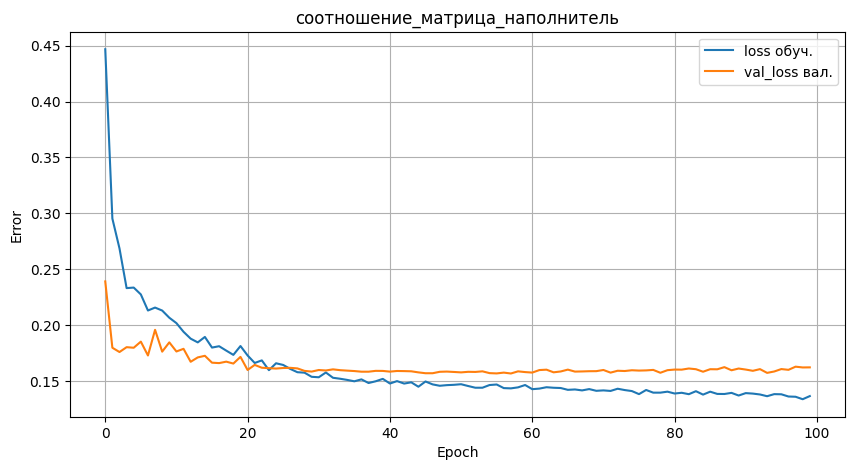

In [156]:
plt.figure(figsize=(10,5))
plt.title(str('cоотношение_матрица_наполнитель'))
plt.plot(history.history['loss'], label='loss обуч.')
plt.plot(history.history['val_loss'], label='val_loss вал.')
#plt.ylim([0,0.4])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

print("\nОценка модели: ", nn_model.evaluate(X_test_n, y_test_n, verbose=1))


Результат отработки модели


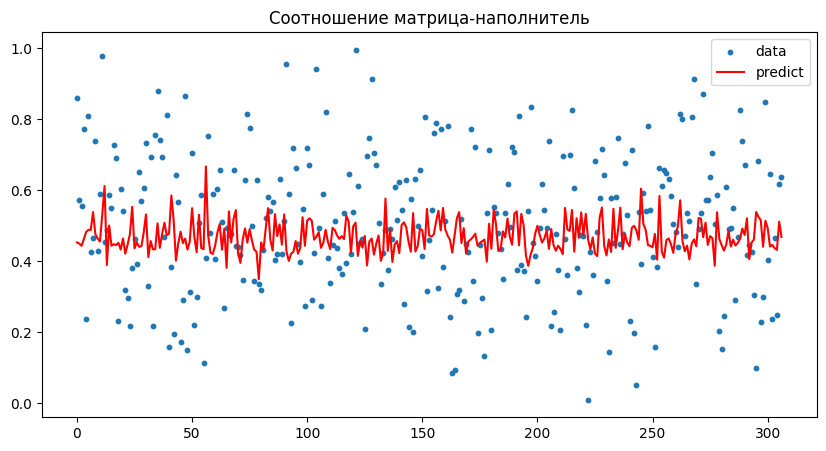

In [157]:
# Отрисовка результата
print('\nРезультат отработки модели')
plt.figure(figsize=(10,5))
plt.scatter(range(0, len(y_test_n)), y_test_n, label = 'data', s =10)
plt.plot(range(0, len(y_test_n)), y_pred_n, label = 'predict', color = 'red')
plt.title(str('Соотношение матрица-наполнитель'))
plt.legend()
plt.show()

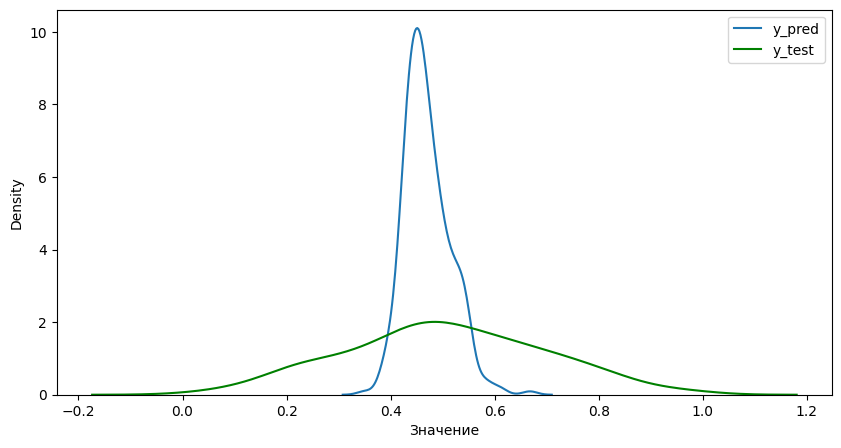

In [158]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=y_pred_n, label = 'y_pred', color='r')
sns.kdeplot(data=y_test_n, label = 'y_test', color='green')
plt.xlabel("Значение")
plt.legend()  
plt.show()

In [160]:
print('Среднеквадратическая ошибка MSE: %.5f' % mean_squared_error(y_test_n, y_pred_n))
print('Средняя абсолютная ошибка MAE: %.5f' % mean_absolute_error(y_test_n, y_pred_n))
print('Коэффициент детерминации r2: ', r2_score(y_test_n, y_pred_n), '\n')

Среднеквадратическая ошибка MSE: 0.03958
Средняя абсолютная ошибка MAE: 0.16241
Коэффициент детерминации r2:  -0.06658996618898816 

